In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

from collections import deque

from keras.models import Sequential
from keras.layers import Dense

In [2]:
aggregators = ['Razorpay', 'CCAvenue', 'Cashfree', 'Paytm', 'Mobikwik']
payment_types = ['UPI_RuPay_Debit', 'NetBanking', 'Wallet', 'Domestic_Debit_Credit_Cards', 
                 'EMI_Credit', 'International', 'International_Diners_Amex']

matrix = [[0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03],
          [0, 0.02, 0.02, 0.02, 0.02, 0.03, 0.04],
          [0, 0.0175, 0.0190, 0.0175, 0.0150, 0.035, 0.0295],
          [0, 0.0199, 0.0199, 0.0199, 0.0299, 0.0299, 0.0299],
          [0, 0.0190, 0.0190, 0.0190, 0.0225, 0.0290, 0.0290]
         ]

In [3]:
updated_keys = []

for i in aggregators:
    for j in payment_types:
        key = (i, j)
        updated_keys.append(key)

len(updated_keys)

35

In [4]:
data = {}

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        key = (i, j)
        value = matrix[i][j]
        data[key] = value

print(data)

{(0, 0): 0.02, (0, 1): 0.02, (0, 2): 0.02, (0, 3): 0.02, (0, 4): 0.02, (0, 5): 0.03, (0, 6): 0.03, (1, 0): 0, (1, 1): 0.02, (1, 2): 0.02, (1, 3): 0.02, (1, 4): 0.02, (1, 5): 0.03, (1, 6): 0.04, (2, 0): 0, (2, 1): 0.0175, (2, 2): 0.019, (2, 3): 0.0175, (2, 4): 0.015, (2, 5): 0.035, (2, 6): 0.0295, (3, 0): 0, (3, 1): 0.0199, (3, 2): 0.0199, (3, 3): 0.0199, (3, 4): 0.0299, (3, 5): 0.0299, (3, 6): 0.0299, (4, 0): 0, (4, 1): 0.019, (4, 2): 0.019, (4, 3): 0.019, (4, 4): 0.0225, (4, 5): 0.029, (4, 6): 0.029}


In [5]:
values = data.values()
values

dict_values([0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0, 0.02, 0.02, 0.02, 0.02, 0.03, 0.04, 0, 0.0175, 0.019, 0.0175, 0.015, 0.035, 0.0295, 0, 0.0199, 0.0199, 0.0199, 0.0299, 0.0299, 0.0299, 0, 0.019, 0.019, 0.019, 0.0225, 0.029, 0.029])

In [6]:
tran_fee_dict = dict(zip(updated_keys, values))
tran_fee_dict

{('Razorpay', 'UPI_RuPay_Debit'): 0.02,
 ('Razorpay', 'NetBanking'): 0.02,
 ('Razorpay', 'Wallet'): 0.02,
 ('Razorpay', 'Domestic_Debit_Credit_Cards'): 0.02,
 ('Razorpay', 'EMI_Credit'): 0.02,
 ('Razorpay', 'International'): 0.03,
 ('Razorpay', 'International_Diners_Amex'): 0.03,
 ('CCAvenue', 'UPI_RuPay_Debit'): 0,
 ('CCAvenue', 'NetBanking'): 0.02,
 ('CCAvenue', 'Wallet'): 0.02,
 ('CCAvenue', 'Domestic_Debit_Credit_Cards'): 0.02,
 ('CCAvenue', 'EMI_Credit'): 0.02,
 ('CCAvenue', 'International'): 0.03,
 ('CCAvenue', 'International_Diners_Amex'): 0.04,
 ('Cashfree', 'UPI_RuPay_Debit'): 0,
 ('Cashfree', 'NetBanking'): 0.0175,
 ('Cashfree', 'Wallet'): 0.019,
 ('Cashfree', 'Domestic_Debit_Credit_Cards'): 0.0175,
 ('Cashfree', 'EMI_Credit'): 0.015,
 ('Cashfree', 'International'): 0.035,
 ('Cashfree', 'International_Diners_Amex'): 0.0295,
 ('Paytm', 'UPI_RuPay_Debit'): 0,
 ('Paytm', 'NetBanking'): 0.0199,
 ('Paytm', 'Wallet'): 0.0199,
 ('Paytm', 'Domestic_Debit_Credit_Cards'): 0.0199,
 ('Pa

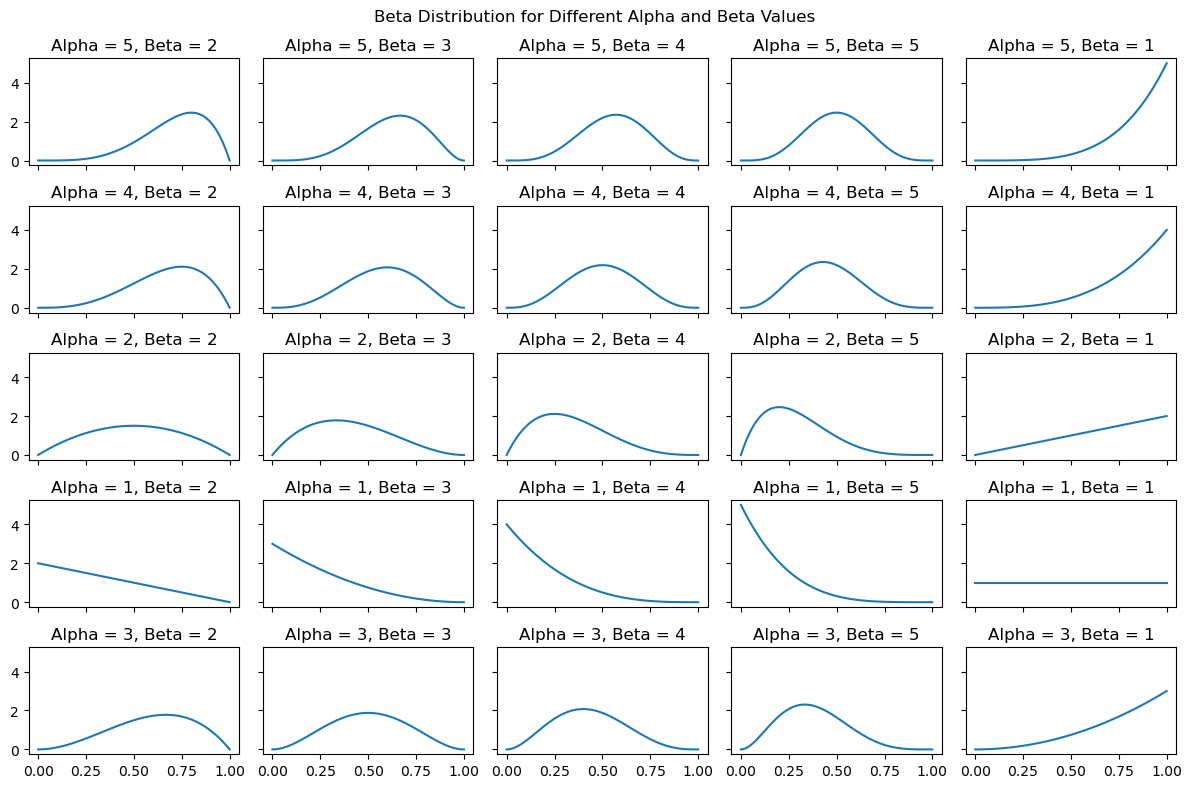

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the range of alpha and beta values
alphas = [5, 4, 2, 1, 3]
betas = [2, 3, 4, 5, 1]

# Create a grid of plots
fig, axes = plt.subplots(len(alphas), len(betas), figsize=(12, 8), sharex=True, sharey=True)

# Generate data and plot the beta distributions
for i, alpha in enumerate(alphas):
    for j, beta_val in enumerate(betas):
        ax = axes[i][j]
        x = np.linspace(0, 1, 100)
        y = beta.pdf(x, alpha, beta_val)
        ax.plot(x, y)
        ax.set_title(f"Alpha = {alpha}, Beta = {beta_val}")

# Add labels and adjust layout
fig.suptitle("Beta Distribution for Different Alpha and Beta Values")
plt.tight_layout()
plt.show()



In [8]:
import random
random.seed(42)

def generate_payment_data(num_samples):
    payment_data = []
    aggregators = ['Cashfree']

    payment_types = ['UPI_RuPay_Debit', 'NetBanking', 'Wallet', 'Domestic_Debit_Credit_Cards', \
                     'EMI_Credit', 'International', 'International_Diners_Amex']
    
    alpha_beta_dict = {
        'UPI_RuPay_Debit': (5, 2),
        'NetBanking': (4, 1),
        'Wallet': (3, 2),
        'Domestic_Debit_Credit_Cards': (4, 1),
        'EMI_Credit': (5, 2),
        'International': (1, 2),
        'International_Diners_Amex': (3, 5)
    }
    
    for i in range(num_samples):
        payment = {}
        payment['amount'] = round(random.lognormvariate(10, 1.1))    
        payment['type'] = random.choice(payment_types)
        payment['aggregator'] = random.choice(aggregators)
        alpha, beta = alpha_beta_dict[payment['type']]
        payment['success_rate'] = round(random.betavariate(alpha, beta), 2)
        payment['processing_time'] = round(random.uniform(0, 10), 2)
        payment['transaction_charge'] = tran_fee_dict[payment['aggregator'], payment['type']]
        payment['merchant_id'] = random.randint(1, 11)
        payment['user_id'] = random.randint(1, num_samples)
        payment['status'] = 1 if payment['success_rate'] > 0.60 else 0
        payment_data.append(payment)

    payment_df = pd.DataFrame(payment_data)
    payment_df = payment_df[['amount', 'type', 'aggregator', 'success_rate', 'processing_time', 'transaction_charge', 'merchant_id', 'user_id', 'status']]
    return payment_df


In [9]:
payment_data = generate_payment_data(1000)
print(payment_data.status.value_counts(normalize=True))
payment_data.head()

1    0.586
0    0.414
Name: status, dtype: float64


amount                       type aggregator  success_rate  \
0   28850                     Wallet   Cashfree          0.36   
1   22256                 NetBanking   Cashfree          0.60   
2   17994                 NetBanking   Cashfree          0.80   
3    4475            UPI_RuPay_Debit   Cashfree          0.45   
4   14562  International_Diners_Amex   Cashfree          0.19   

   processing_time  transaction_charge  merchant_id  user_id  status  
0             0.87              0.0190            7       33       0  
1             0.06              0.0175            3      715       0  
2             3.44              0.0175            5      827       1  
3             3.62              0.0000            4      722       0  
4             6.84              0.0295            2      624       0

In [10]:
df = payment_data

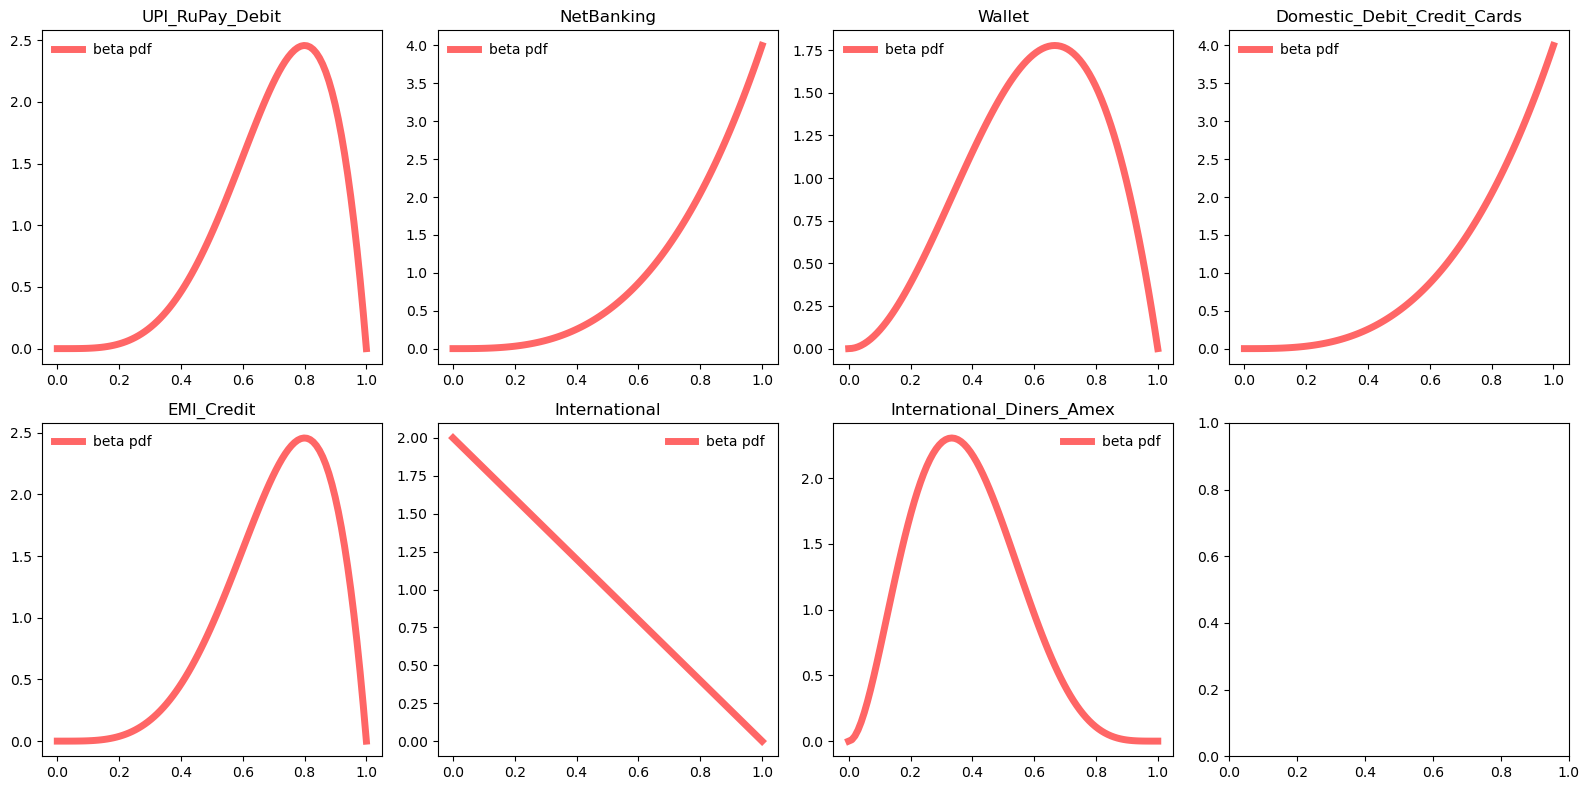

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import beta

payment_types = ['UPI_RuPay_Debit', 'NetBanking', 'Wallet', 'Domestic_Debit_Credit_Cards', \
                 'EMI_Credit', 'International', 'International_Diners_Amex']

alpha_beta_dict = {
    'UPI_RuPay_Debit': (5, 2),
    'NetBanking': (4, 1),
    'Wallet': (3, 2),
    'Domestic_Debit_Credit_Cards': (4, 1),
    'EMI_Credit': (5, 2),
    'International': (1, 2),
    'International_Diners_Amex': (3, 5)
}

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for i, payment_type in enumerate(payment_types):
    alpha, betaa = alpha_beta_dict[payment_type]
    row = i // 4
    col = i % 4
    x = np.linspace(0, 1, 100)
    axs[row, col].plot(x, beta.pdf(x, alpha, betaa), 'r-', lw=5, alpha=0.6, label='beta pdf')
    axs[row, col].set_title(payment_type)
    axs[row, col].legend(loc='best', frameon=False)

plt.tight_layout()
plt.show()

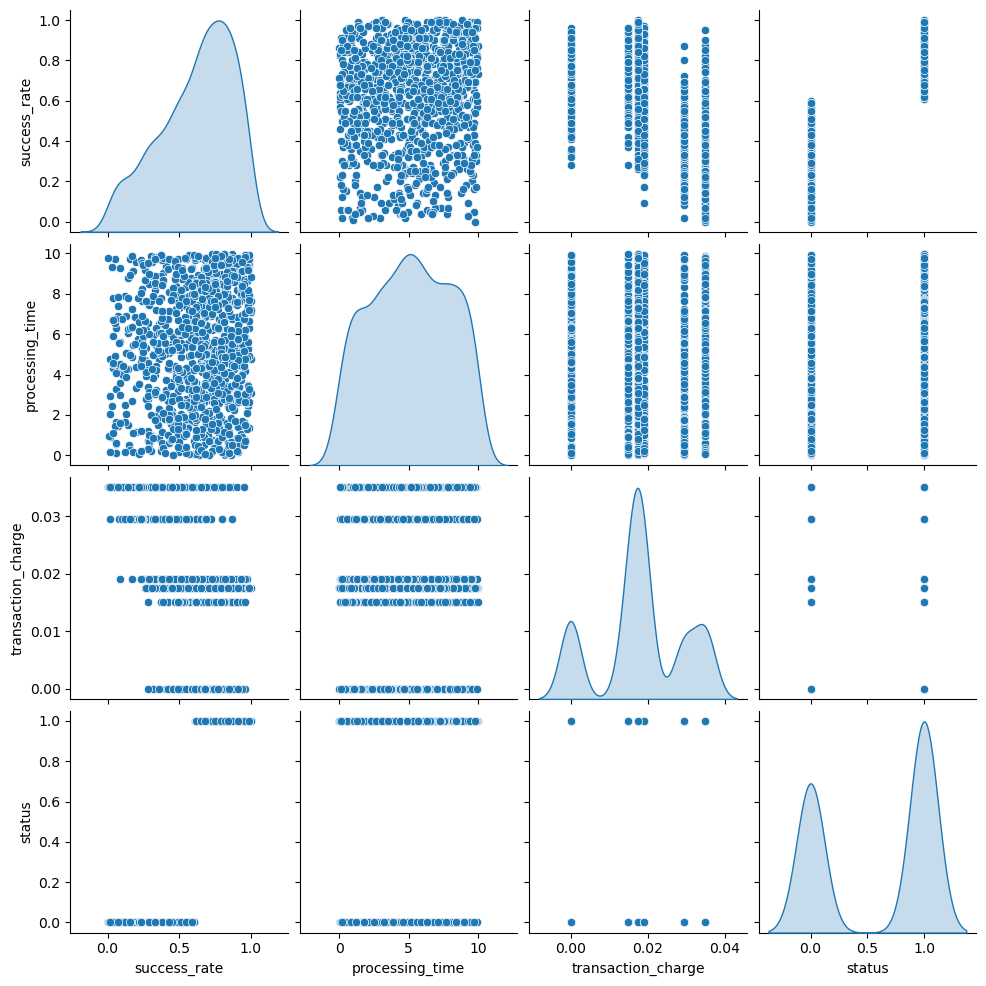

In [12]:
sns.pairplot(df.drop(['amount', 'merchant_id', 'user_id'], axis = 1), diag_kind='kde')
plt.show()

In [13]:
df.drop(['amount', 'merchant_id', 'user_id'], axis = 1).describe()

success_rate  processing_time  transaction_charge       status
count   1000.000000      1000.000000         1000.000000  1000.000000
mean       0.618500         5.121020            0.018336     0.586000
std        0.252037         2.850764            0.010885     0.492795
min        0.000000         0.000000            0.000000     0.000000
25%        0.450000         2.820000            0.015000     0.000000
50%        0.670000         5.160000            0.017500     1.000000
75%        0.820000         7.572500            0.029500     1.000000
max        1.000000         9.990000            0.035000     1.000000

In [14]:
df

amount                       type aggregator  success_rate  \
0     28850                     Wallet   Cashfree          0.36   
1     22256                 NetBanking   Cashfree          0.60   
2     17994                 NetBanking   Cashfree          0.80   
3      4475            UPI_RuPay_Debit   Cashfree          0.45   
4     14562  International_Diners_Amex   Cashfree          0.19   
..      ...                        ...        ...           ...   
995   18536  International_Diners_Amex   Cashfree          0.23   
996   24593                     Wallet   Cashfree          0.59   
997    9191                     Wallet   Cashfree          0.43   
998   35411            UPI_RuPay_Debit   Cashfree          0.68   
999    5471                 NetBanking   Cashfree          0.84   

     processing_time  transaction_charge  merchant_id  user_id  status  
0               0.87              0.0190            7       33       0  
1               0.06              0.0175            3      715       0  
2               3.44              0.0175            5      827       1  
3               3.62              0.0000            4      722       0  
4               6.84              0.0295            2      624       0  
..               ...                 ...          ...      ...     ...  
995             1.18              0.0295            5      738       0  
996             7.14              0.0190            9      620       0  
997             1.79              0.0190            8       69       0  
998             3.50              0.0000            9      905       1  
999             7.29              0.0175            6      640       1  

[1000 rows x 9 columns]

In [15]:
df['log_amount'] = df.amount.apply(lambda x: np.log(x))

In [16]:
# Define the available payment methods and their corresponding action indices
actions = ['UPI_RuPay_Debit', 'NetBanking', 'Wallet', 'Domestic_Debit_Credit_Cards', 
                 'EMI_Credit', 'International', 'International_Diners_Amex']
action_indices = {action: i for i, action in enumerate(actions)}
action_indices

{'UPI_RuPay_Debit': 0,
 'NetBanking': 1,
 'Wallet': 2,
 'Domestic_Debit_Credit_Cards': 3,
 'EMI_Credit': 4,
 'International': 5,
 'International_Diners_Amex': 6}

In [17]:
df.head(3)

amount        type aggregator  success_rate  processing_time  \
0   28850      Wallet   Cashfree          0.36             0.87   
1   22256  NetBanking   Cashfree          0.60             0.06   
2   17994  NetBanking   Cashfree          0.80             3.44   

   transaction_charge  merchant_id  user_id  status  log_amount  
0              0.0190            7       33       0   10.269865  
1              0.0175            3      715       0   10.010367  
2              0.0175            5      827       1    9.797794

In [18]:
df.rename(columns={'success': 'status'}, inplace=True)

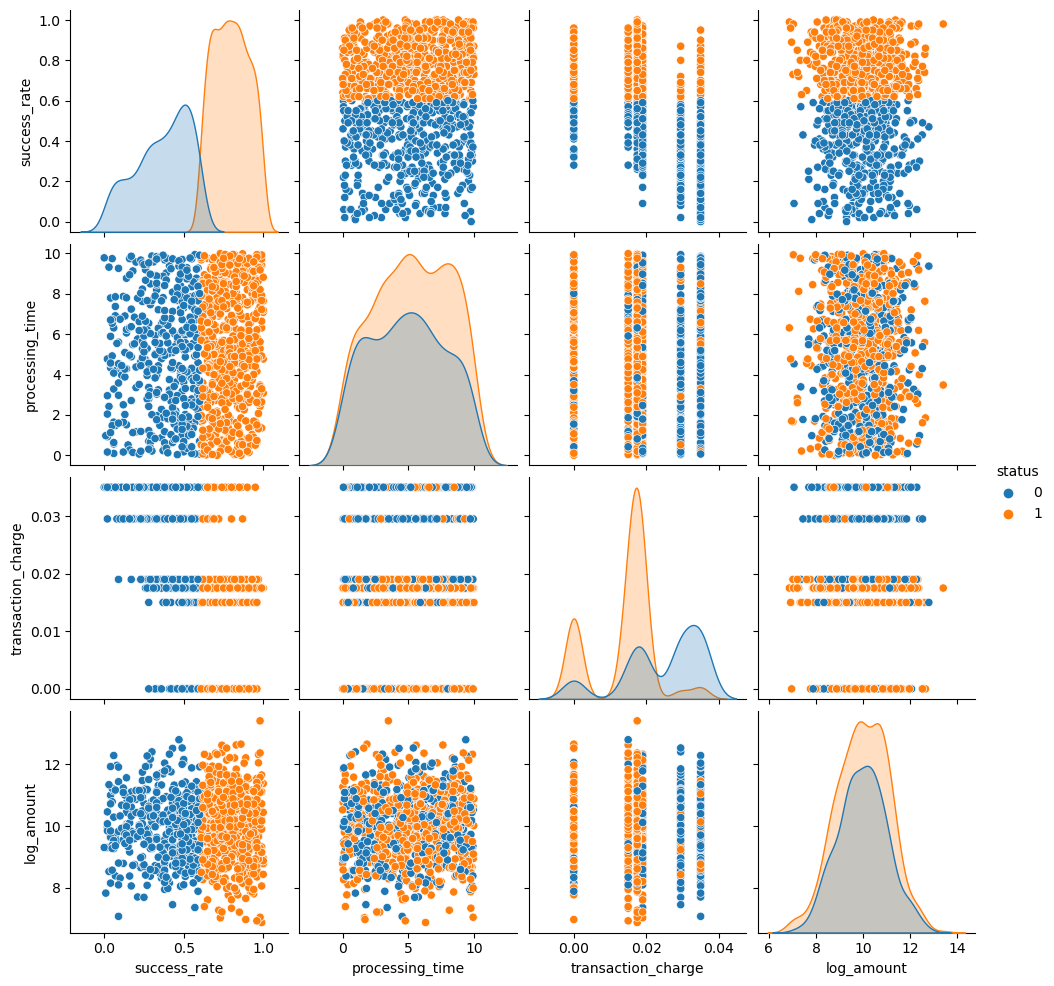

In [20]:
sns.pairplot(df.drop(['amount', 'merchant_id', 'user_id'], axis = 1), diag_kind='kde', hue='status')
plt.show()

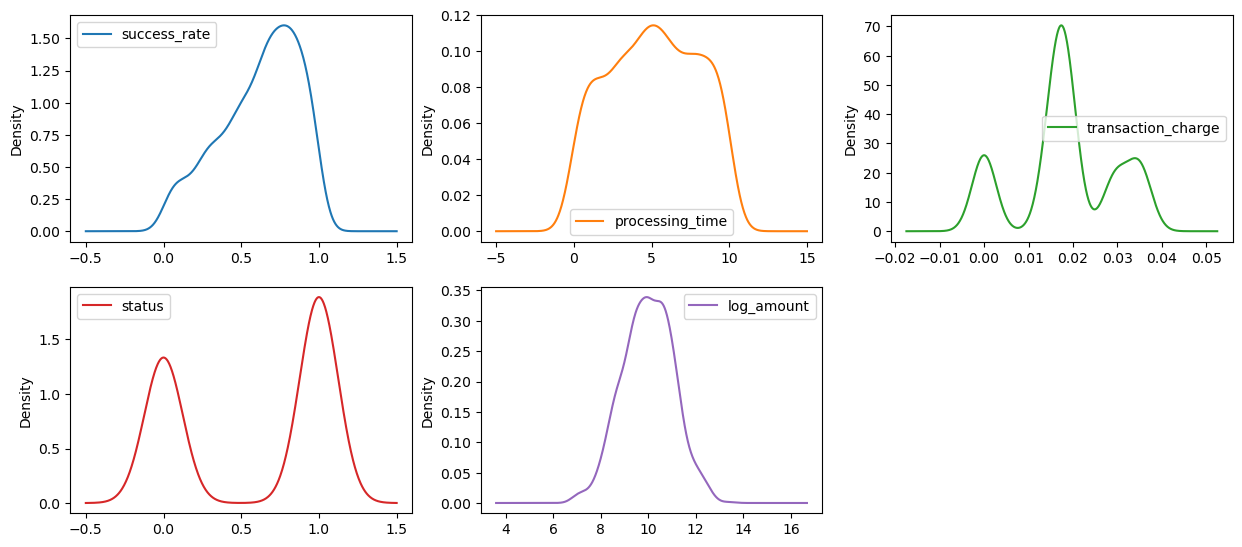

In [21]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.drop(['amount', 'merchant_id', 'user_id'], axis = 1).plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [22]:
# calculate the correlation between the variables
corr = df.drop(['amount', 'merchant_id', 'user_id'], axis = 1).corr()

# print correaltion matrix
corr

success_rate  processing_time  transaction_charge  \
success_rate            1.000000         0.079480           -0.544622   
processing_time         0.079480         1.000000           -0.051191   
transaction_charge     -0.544622        -0.051191            1.000000   
status                  0.841236         0.067037           -0.475108   
log_amount             -0.025300         0.010330            0.005515   

                      status  log_amount  
success_rate        0.841236   -0.025300  
processing_time     0.067037    0.010330  
transaction_charge -0.475108    0.005515  
status              1.000000    0.004642  
log_amount          0.004642    1.000000

In [23]:
df.head()

amount                       type aggregator  success_rate  \
0   28850                     Wallet   Cashfree          0.36   
1   22256                 NetBanking   Cashfree          0.60   
2   17994                 NetBanking   Cashfree          0.80   
3    4475            UPI_RuPay_Debit   Cashfree          0.45   
4   14562  International_Diners_Amex   Cashfree          0.19   

   processing_time  transaction_charge  merchant_id  user_id  status  \
0             0.87              0.0190            7       33       0   
1             0.06              0.0175            3      715       0   
2             3.44              0.0175            5      827       1   
3             3.62              0.0000            4      722       0   
4             6.84              0.0295            2      624       0   

   log_amount  
0   10.269865  
1   10.010367  
2    9.797794  
3    8.406262  
4    9.586171

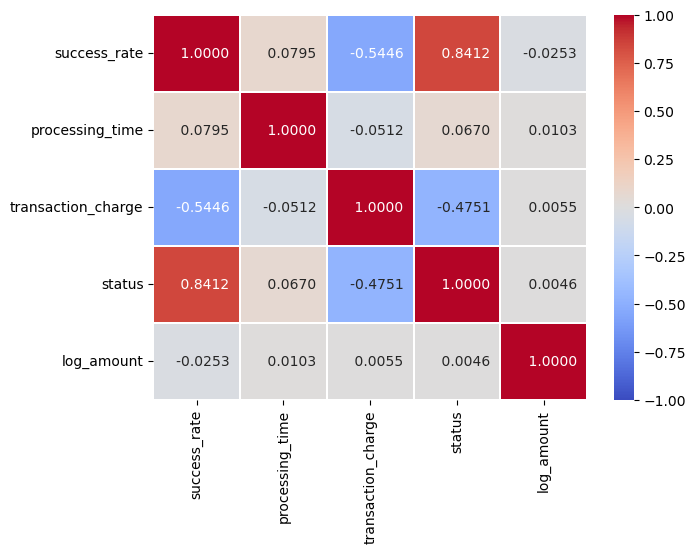

In [24]:
# set the plot size
fig,ax = plt.subplots(figsize=(7, 5))

# plot a heatmap for the correlation matrix
# annot: print values in each cell
# linewidths: specify width of the line specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# cmap: colour code of the plot
# fmt: set the decimal place of annot
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "coolwarm" , fmt = '10.4f')

# display the plot
plt.show()

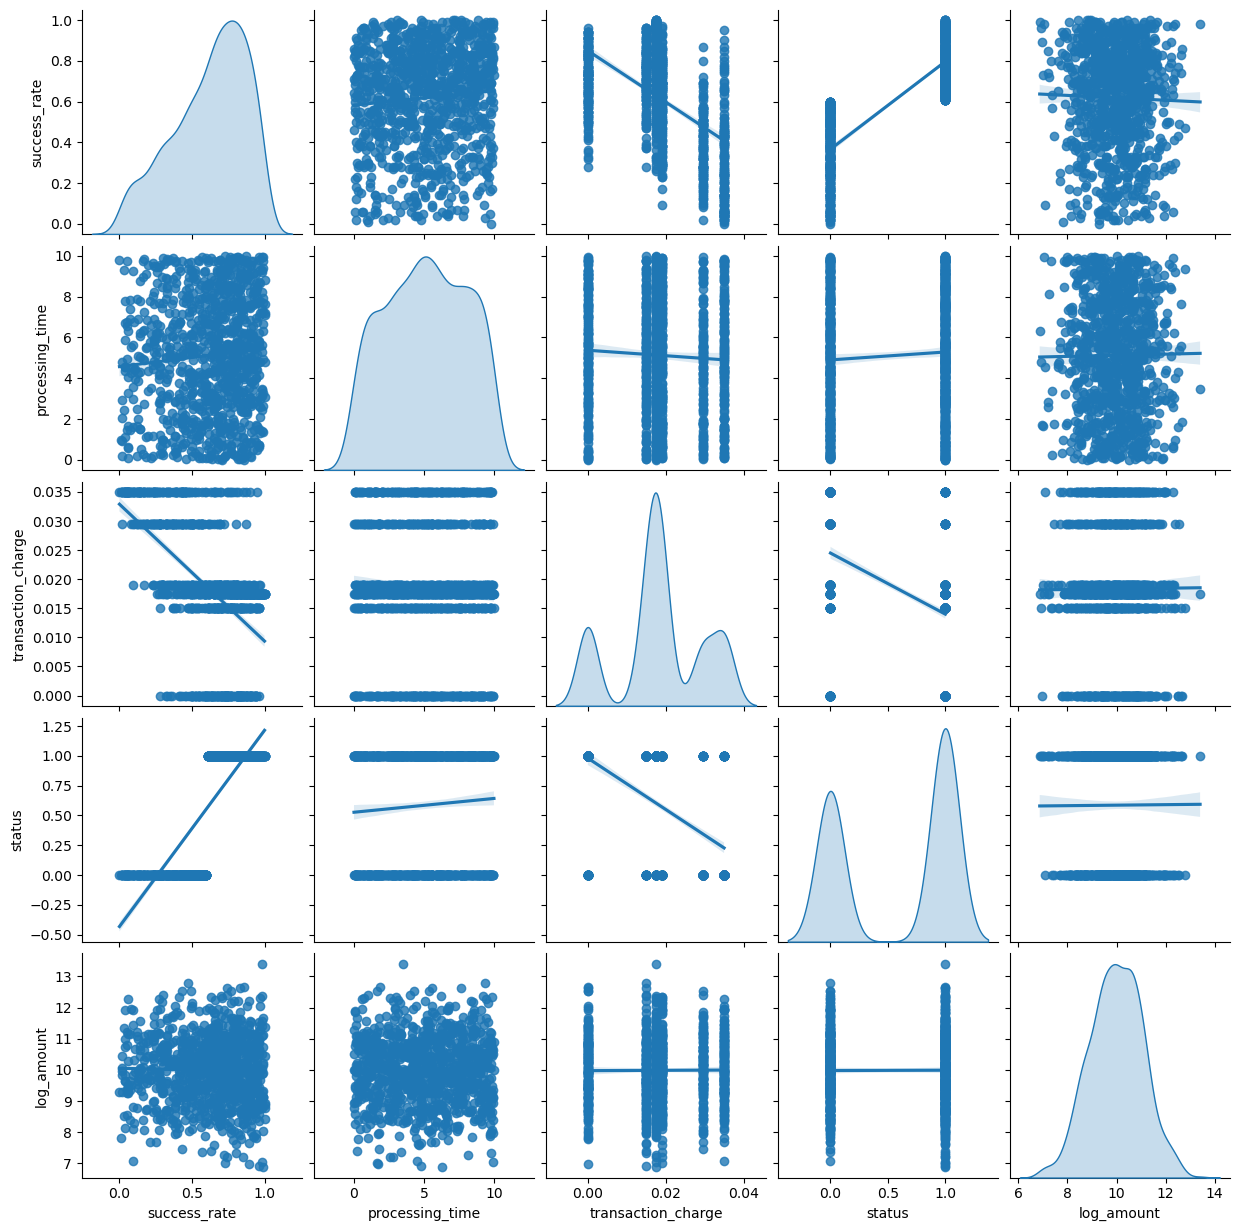

In [25]:
sns.pairplot(data=df.drop(['amount', 'merchant_id', 'user_id'], axis = 1), kind='reg', diag_kind='kde')
plt.show()

In [26]:
df.head(3)

amount        type aggregator  success_rate  processing_time  \
0   28850      Wallet   Cashfree          0.36             0.87   
1   22256  NetBanking   Cashfree          0.60             0.06   
2   17994  NetBanking   Cashfree          0.80             3.44   

   transaction_charge  merchant_id  user_id  status  log_amount  
0              0.0190            7       33       0   10.269865  
1              0.0175            3      715       0   10.010367  
2              0.0175            5      827       1    9.797794

In [27]:
data = df.drop(['amount', 'merchant_id', 'user_id'], axis = 1)
data

type aggregator  success_rate  processing_time  \
0                       Wallet   Cashfree          0.36             0.87   
1                   NetBanking   Cashfree          0.60             0.06   
2                   NetBanking   Cashfree          0.80             3.44   
3              UPI_RuPay_Debit   Cashfree          0.45             3.62   
4    International_Diners_Amex   Cashfree          0.19             6.84   
..                         ...        ...           ...              ...   
995  International_Diners_Amex   Cashfree          0.23             1.18   
996                     Wallet   Cashfree          0.59             7.14   
997                     Wallet   Cashfree          0.43             1.79   
998            UPI_RuPay_Debit   Cashfree          0.68             3.50   
999                 NetBanking   Cashfree          0.84             7.29   

     transaction_charge  status  log_amount  
0                0.0190       0   10.269865  
1                0.0175       0   10.010367  
2                0.0175       1    9.797794  
3                0.0000       0    8.406262  
4                0.0295       0    9.586171  
..                  ...     ...         ...  
995              0.0295       0    9.827470  
996              0.0190       0   10.110217  
997              0.0190       0    9.125980  
998              0.0000       1   10.474778  
999              0.0175       1    8.607217  

[1000 rows x 7 columns]

In [28]:
df.head(3)

amount        type aggregator  success_rate  processing_time  \
0   28850      Wallet   Cashfree          0.36             0.87   
1   22256  NetBanking   Cashfree          0.60             0.06   
2   17994  NetBanking   Cashfree          0.80             3.44   

   transaction_charge  merchant_id  user_id  status  log_amount  
0              0.0190            7       33       0   10.269865  
1              0.0175            3      715       0   10.010367  
2              0.0175            5      827       1    9.797794

In [29]:
df_num = df.select_dtypes(include = [np.number])
df_cat = df.select_dtypes(exclude = [np.number])

In [30]:
df_cat = df_cat.drop('aggregator', axis = 1)
df_num = df_num.drop(['amount', 'merchant_id', 'user_id'], axis = 1)

In [31]:
df_num

success_rate  processing_time  transaction_charge  status  log_amount
0            0.36             0.87              0.0190       0   10.269865
1            0.60             0.06              0.0175       0   10.010367
2            0.80             3.44              0.0175       1    9.797794
3            0.45             3.62              0.0000       0    8.406262
4            0.19             6.84              0.0295       0    9.586171
..            ...              ...                 ...     ...         ...
995          0.23             1.18              0.0295       0    9.827470
996          0.59             7.14              0.0190       0   10.110217
997          0.43             1.79              0.0190       0    9.125980
998          0.68             3.50              0.0000       1   10.474778
999          0.84             7.29              0.0175       1    8.607217

[1000 rows x 5 columns]

In [32]:
# Define the available payment methods and their corresponding action indices
actions = ['UPI_RuPay_Debit', 'NetBanking', 'Wallet', 'Domestic_Debit_Credit_Cards', 
                 'EMI_Credit', 'International', 'International_Diners_Amex']
action_indices = {action: i for i, action in enumerate(actions)}
action_indices

{'UPI_RuPay_Debit': 0,
 'NetBanking': 1,
 'Wallet': 2,
 'Domestic_Debit_Credit_Cards': 3,
 'EMI_Credit': 4,
 'International': 5,
 'International_Diners_Amex': 6}

In [33]:
df_cat_encoded = df_cat.replace({'type' : { 'UPI_RuPay_Debit': 0,
 'NetBanking': 1,
 'Wallet': 2,
 'Domestic_Debit_Credit_Cards': 3,
 'EMI_Credit': 4,
 'International': 5,
 'International_Diners_Amex': 6 }, 'status': {'success': 1, 'failure': 0}})

In [34]:
df_cat_encoded.head()

type
0     2
1     1
2     1
3     0
4     6

In [35]:
ms = MinMaxScaler()
scaled = ms.fit_transform(df_num)
df_num_scaled = pd.DataFrame(scaled, columns=df_num.columns)

In [36]:
y = df_cat_encoded.type.values

In [37]:
X_y = pd.concat([df_num_scaled, df_cat_encoded], axis=1)
X_y.head(3)

success_rate  processing_time  transaction_charge  status  log_amount  type
0          0.36         0.087087            0.542857     0.0     0.52012     2
1          0.60         0.006006            0.500000     0.0     0.48042     1
2          0.80         0.344344            0.500000     1.0     0.44790     1

In [38]:
X_y.shape

(1000, 6)

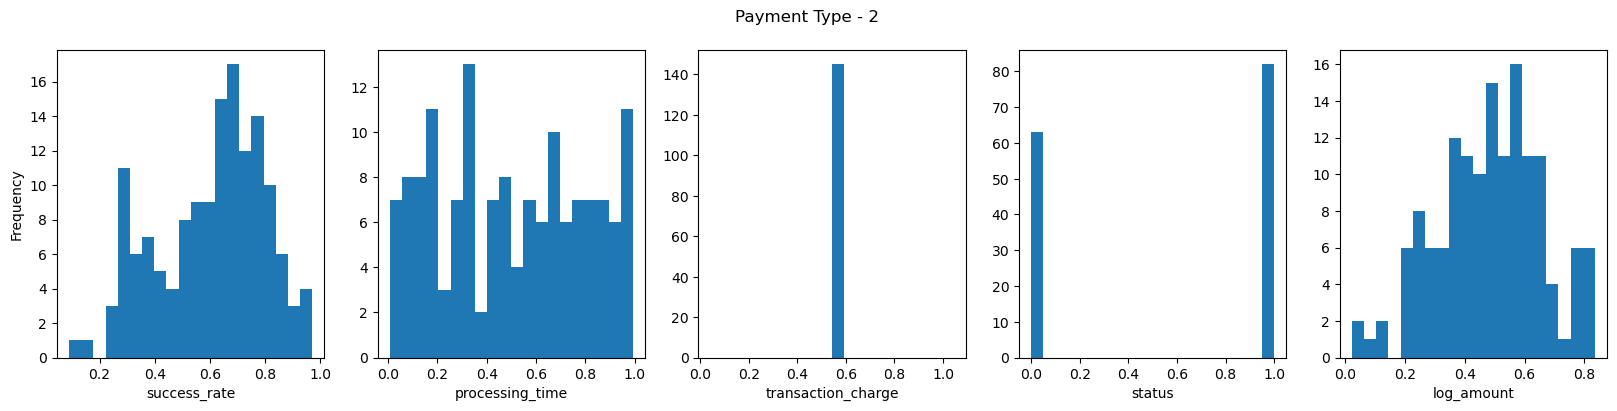

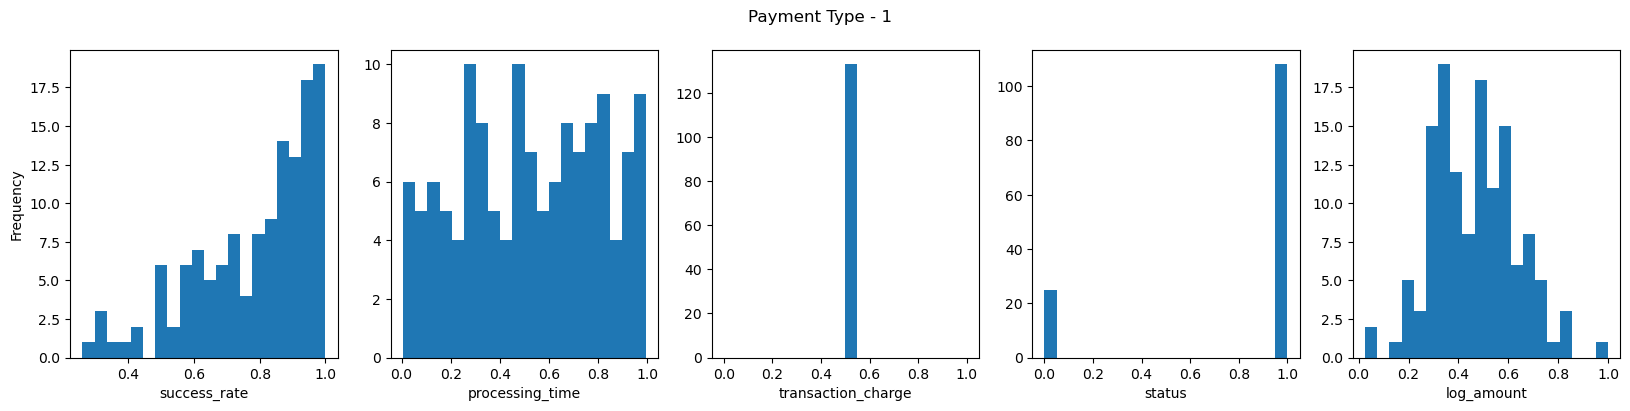

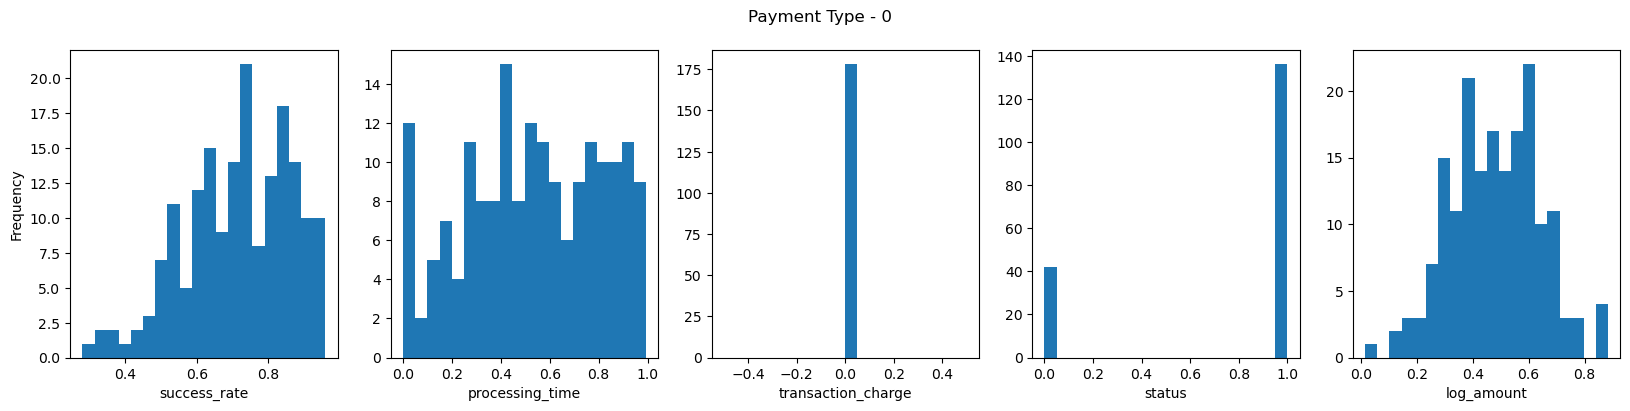

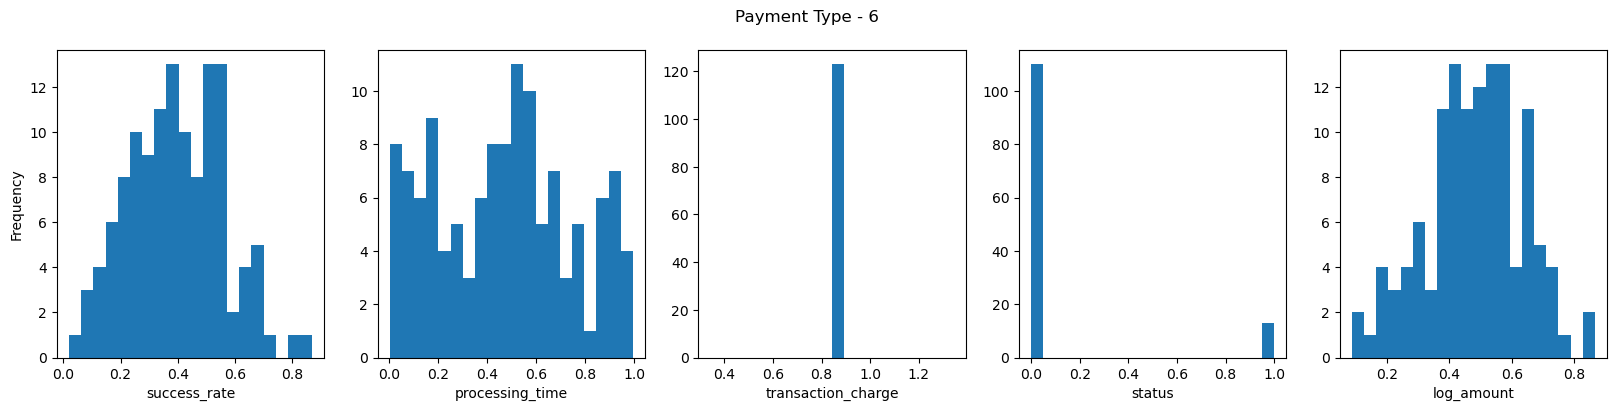

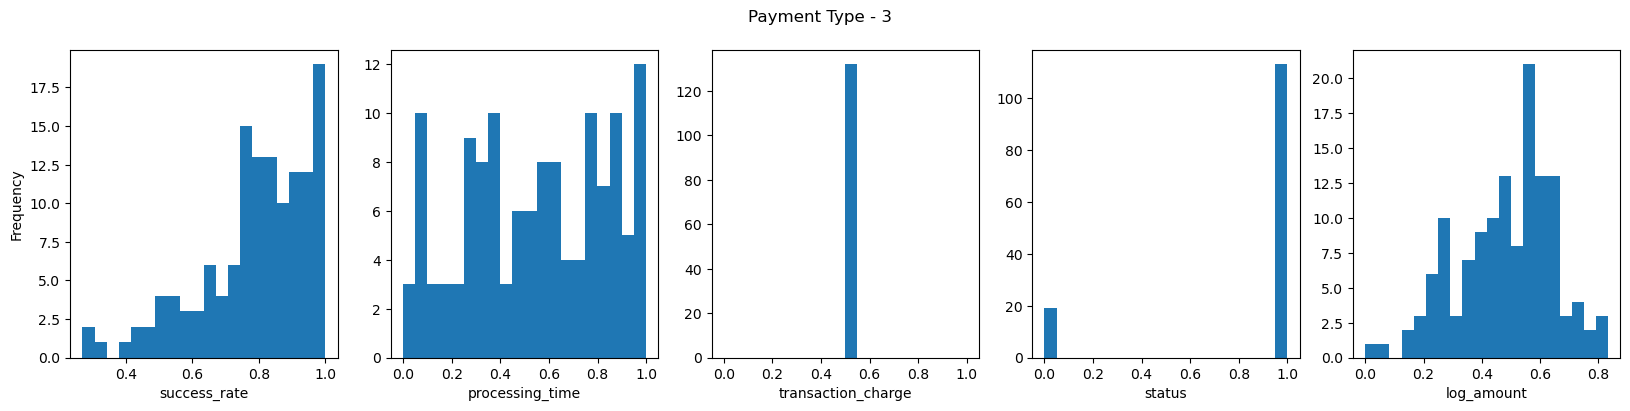

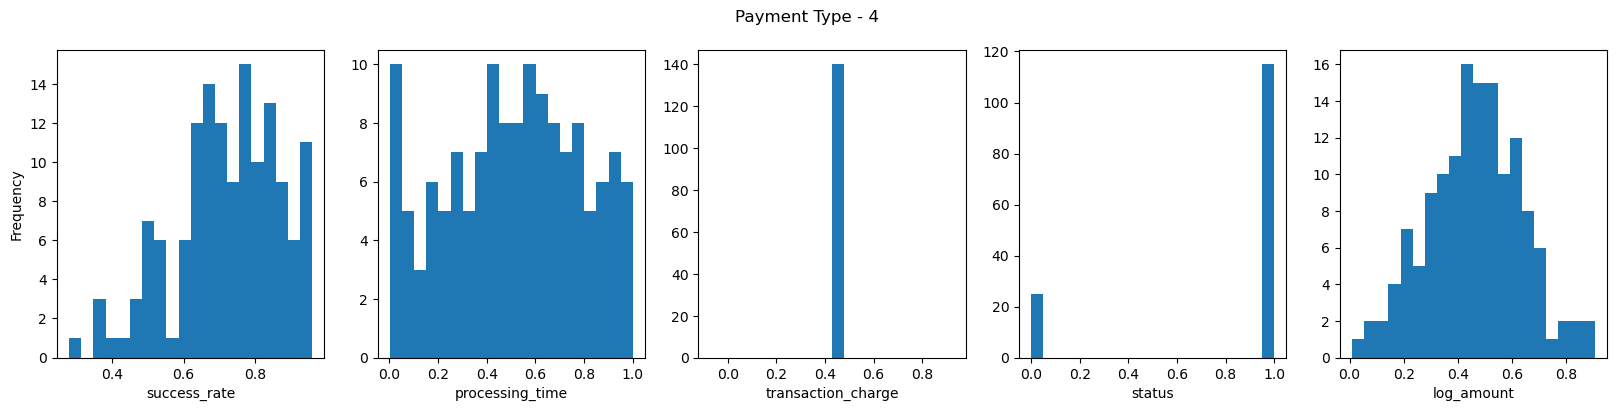

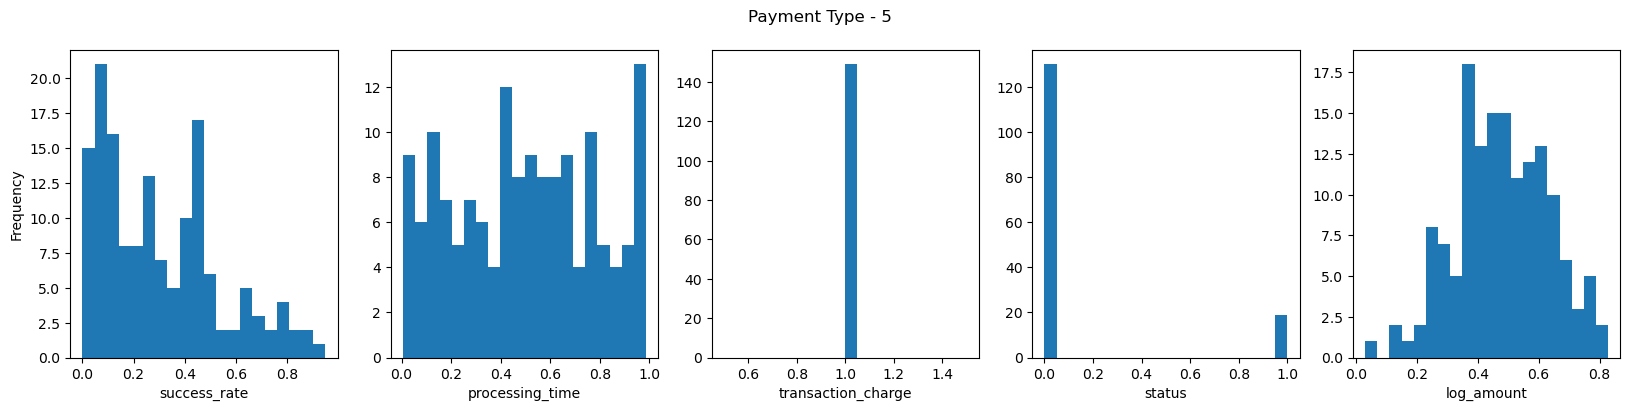

In [39]:
# Plot the distribution for each payment type
payment_types = X_y['type'].unique()
for payment_type in payment_types:
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    axs[0].set_ylabel('Frequency')
    fig.suptitle(f'Payment Type - {payment_type}')
    data = X_y[X_y['type'] == payment_type]
    for i, col in enumerate(X_y.columns[:-1]):
        axs[i].hist(data[col], bins=20)
        axs[i].set_xlabel(col)
    plt.show()

In [141]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, df_cat_encoded.drop('type', axis=1)], axis = 1)

# display first five observations
X.head()

success_rate  processing_time  transaction_charge  status  log_amount
0          0.36         0.087087            0.542857     0.0    0.520120
1          0.60         0.006006            0.500000     0.0    0.480420
2          0.80         0.344344            0.500000     1.0    0.447900
3          0.45         0.362362            0.000000     0.0    0.235017
4          0.19         0.684685            0.842857     0.0    0.415525

In [40]:
X_y.to_csv('jun_11_1K_X_y_03.csv')

In [142]:
X_y.to_csv('jun_04_1K_X_y_02.csv')

In [101]:
#X_y.to_csv('jun_04_10K_X_y_01.csv')

In [102]:
#X_y.to_csv('jun_01_100K_X_y_01.csv')

In [9]:
df = pd.read_csv('june_7_final_data.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head(3)

success_rate  processing_time  transaction_charge  status  log_amount  \
0          0.36         0.087087            0.542857     0.0     0.52012   
1          0.60         0.006006            0.500000     0.0     0.48042   
2          0.80         0.344344            0.500000     1.0     0.44790   

   type    reward  
0     2  0.000000  
1     1  0.000000  
2     1  0.503558

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   success_rate        1000 non-null   float64
 1   processing_time     1000 non-null   float64
 2   transaction_charge  1000 non-null   float64
 3   status              1000 non-null   float64
 4   log_amount          1000 non-null   float64
 5   type                1000 non-null   int64  
 6   reward              1000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


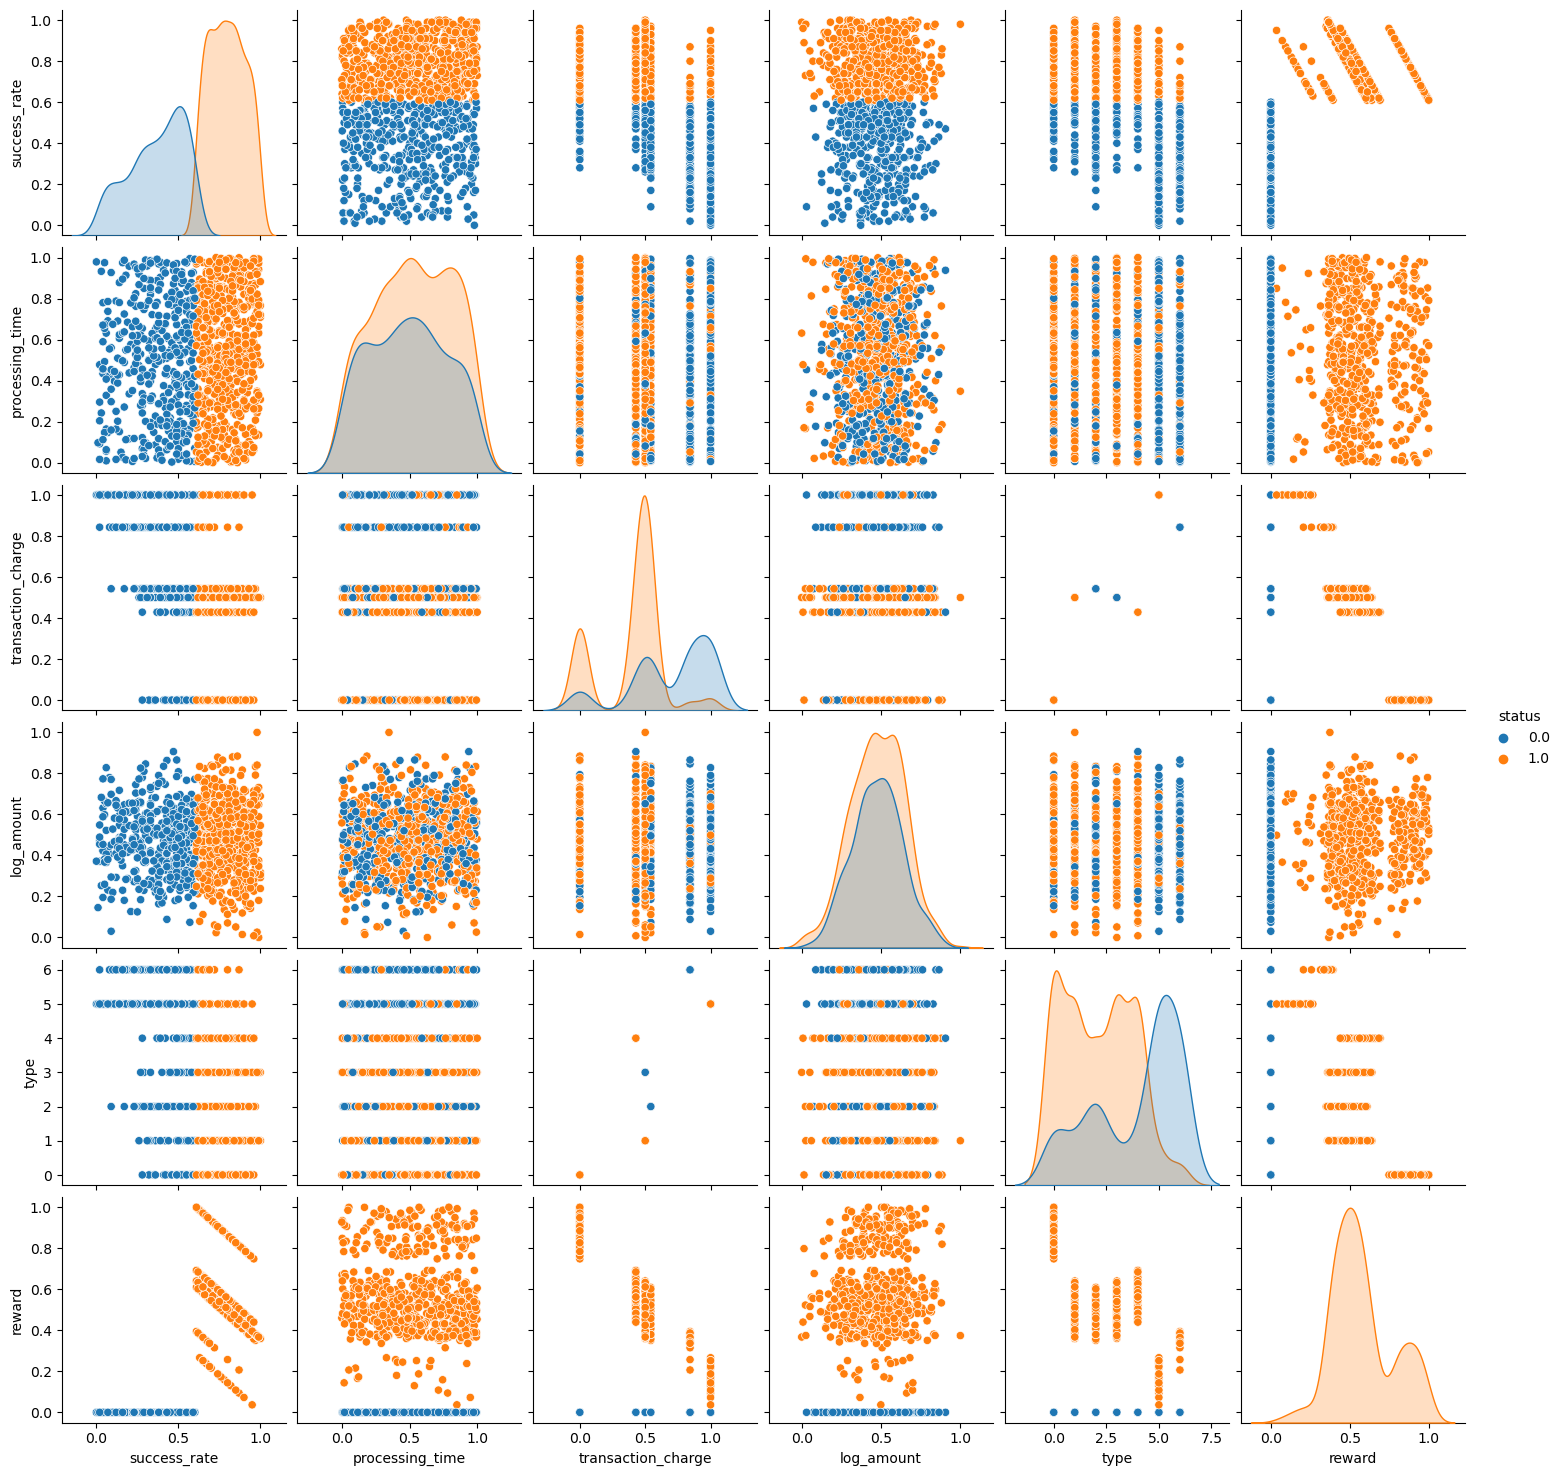

In [12]:
sns.pairplot(df, diag_kind='kde', hue='status')
plt.show()

In [19]:
for i, col in enumerate(df.drop('type', axis=1).columns):
    print(i, col)

0 success_rate
1 processing_time
2 transaction_charge
3 status
4 log_amount
5 reward


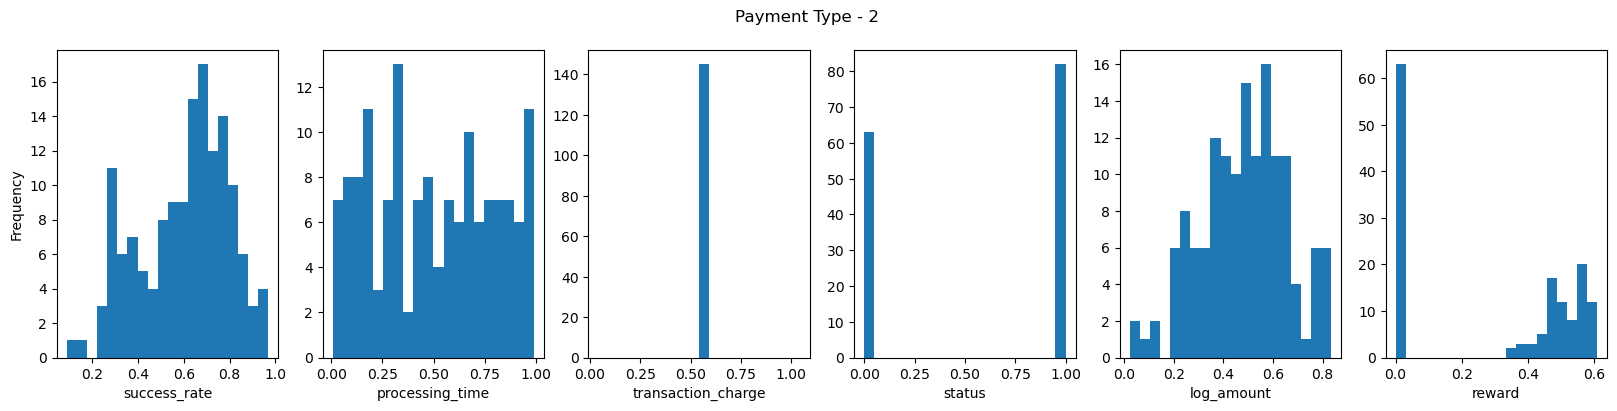

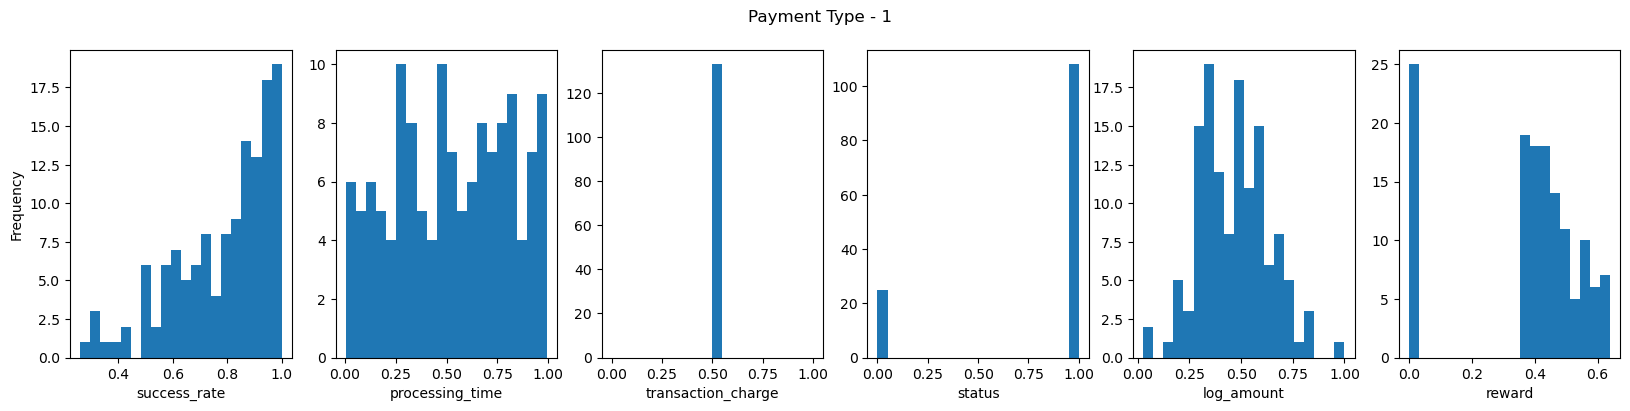

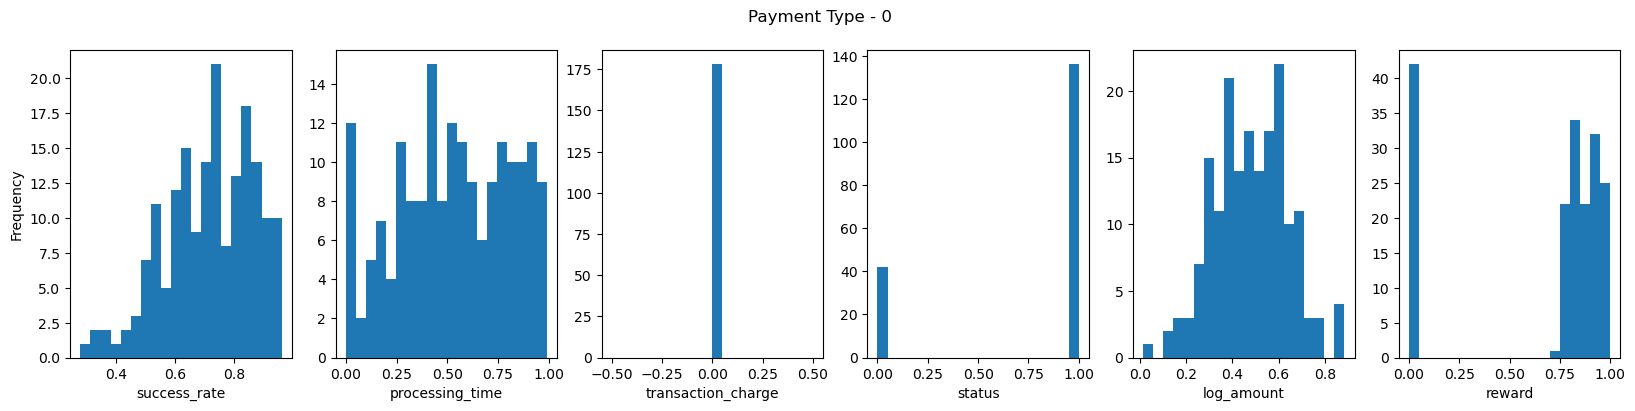

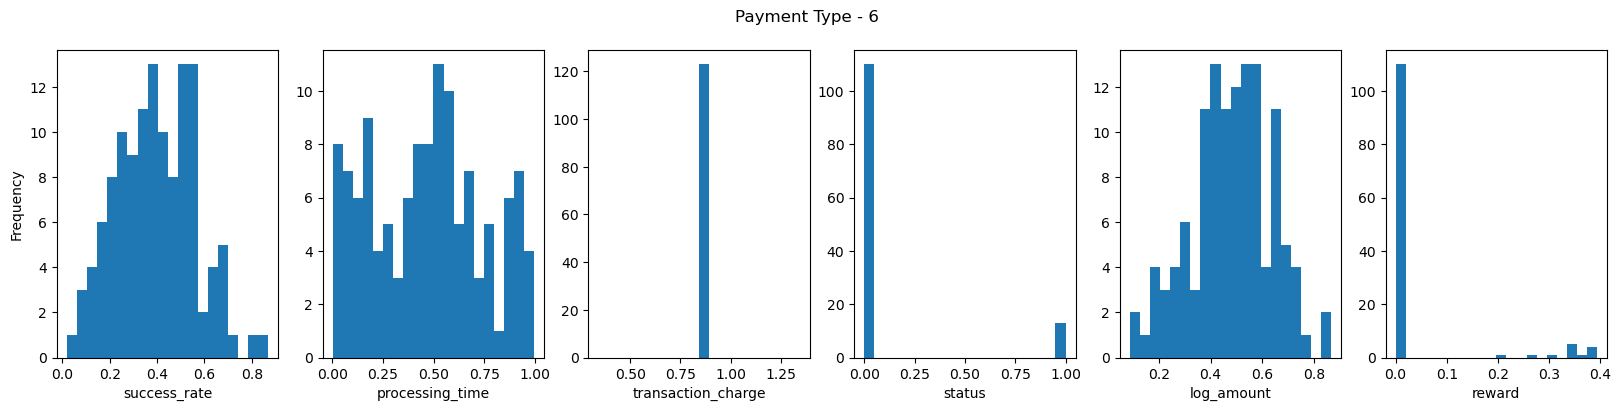

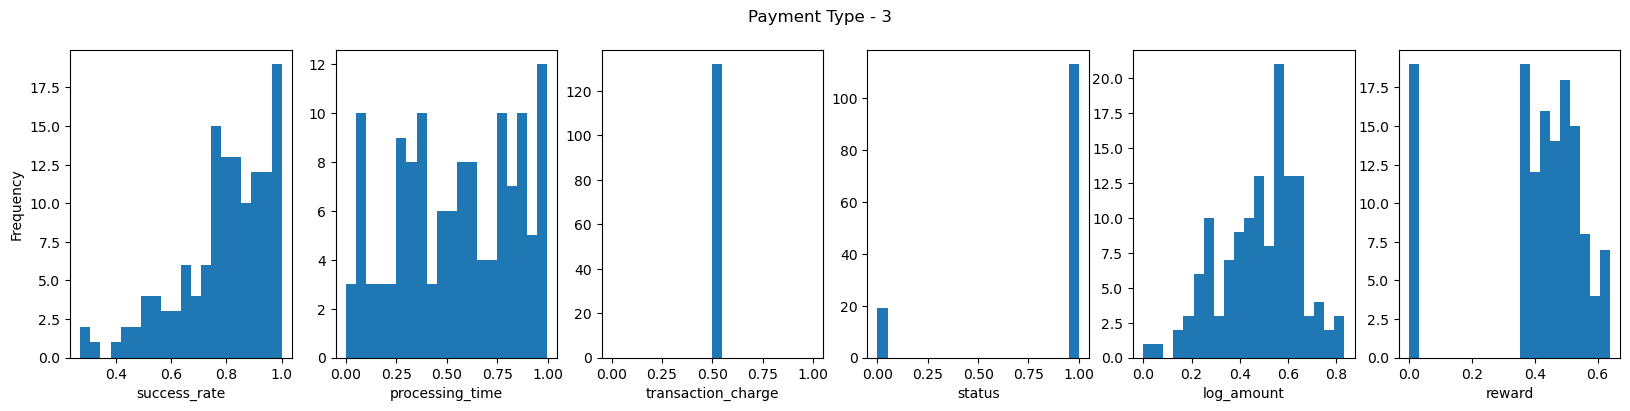

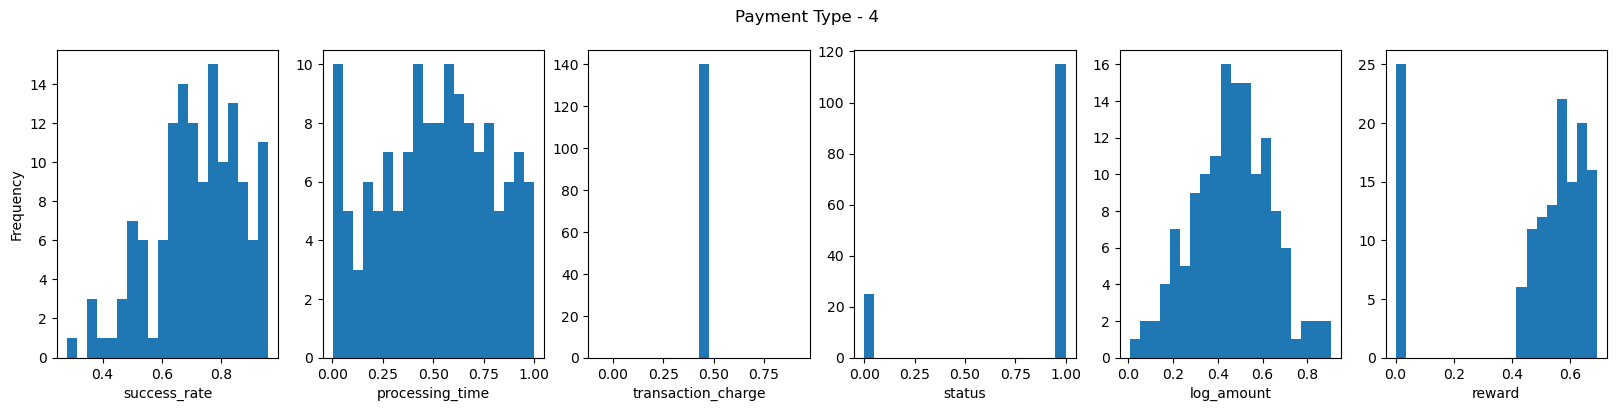

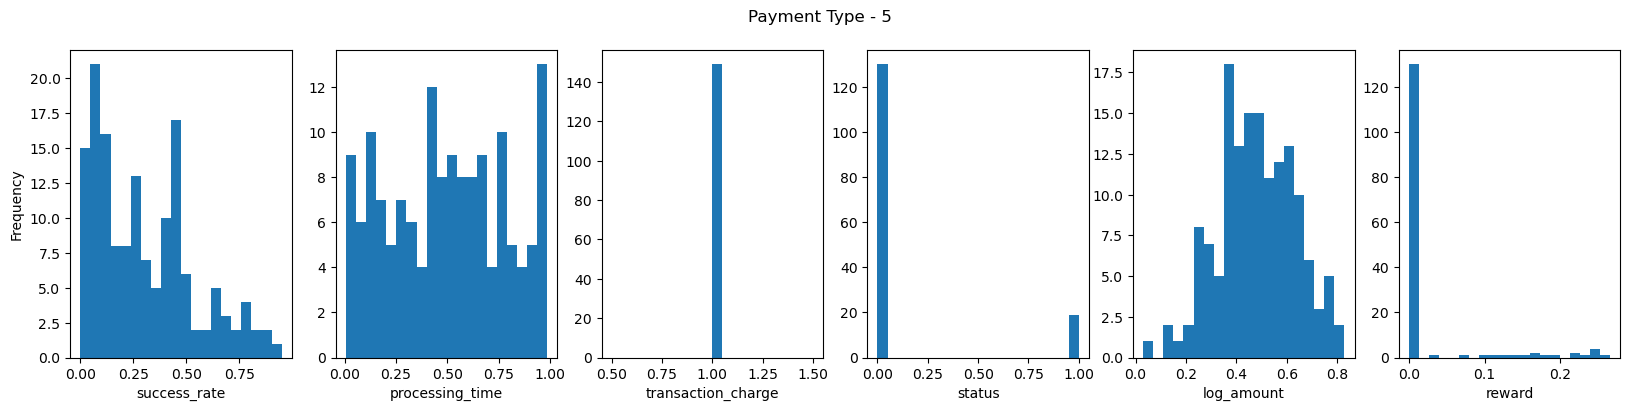

In [20]:
# Plot the distribution for each payment type
payment_types = df['type'].unique()
for payment_type in payment_types:
    fig, axs = plt.subplots(1, 6, figsize=(20, 4))
    axs[0].set_ylabel('Frequency')
    fig.suptitle(f'Payment Type - {payment_type}')
    data = df[df['type'] == payment_type]
    for i, col in enumerate(df.drop('type', axis=1).columns):
        axs[i].hist(data[col], bins=20)
        axs[i].set_xlabel(col)
    plt.show()

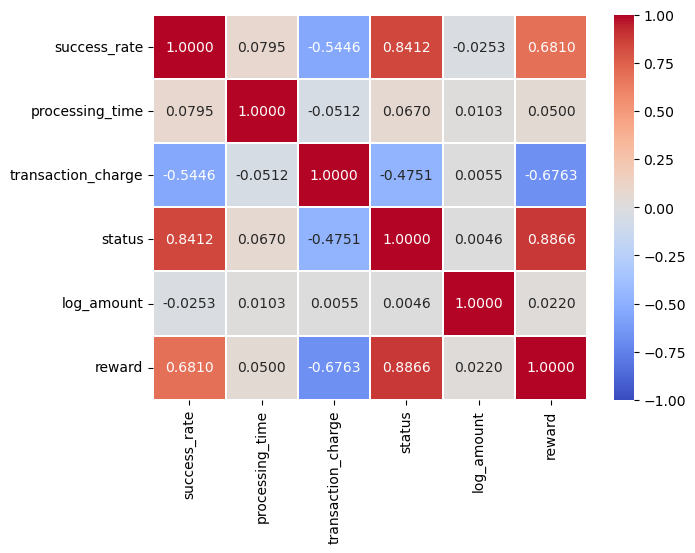

In [26]:
# calculate the correlation between the variables
corr = df.drop('type', axis=1).corr()

# set the plot size
fig,ax = plt.subplots(figsize=(7, 5))

# plot a heatmap for the correlation matrix
# annot: print values in each cell
# linewidths: specify width of the line specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# cmap: colour code of the plot
# fmt: set the decimal place of annot
sns.heatmap(corr, annot = True, linewidths = 0.08, vmin = -1 , vmax = 1, cmap = "coolwarm" , fmt = '4.4f')

# display the plot
plt.show()

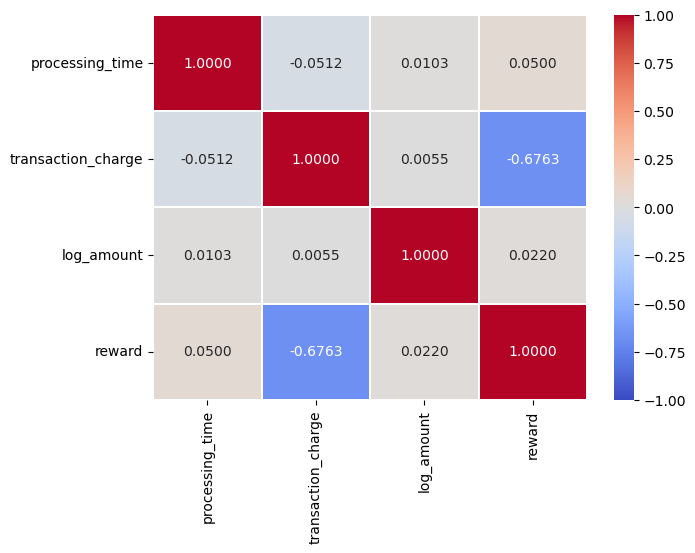

In [28]:
# calculate the correlation between the variables
corr = df.drop(['type', 'success_rate', 'status'], axis=1).corr()

# set the plot size
fig,ax = plt.subplots(figsize=(7, 5))

# plot a heatmap for the correlation matrix
# annot: print values in each cell
# linewidths: specify width of the line specifying the plot
# vmin: minimum value of the variable
# vmax: maximum value of the variable
# cmap: colour code of the plot
# fmt: set the decimal place of annot
sns.heatmap(corr, annot = True, linewidths = 0.04, vmin = -1 , vmax = 1, cmap = "coolwarm" , fmt = '4.4f')

# display the plot
plt.show()

In [53]:
X_y.shape

(10000, 6)

In [56]:
X_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   success_rate        100000 non-null  float64
 1   processing_time     100000 non-null  float64
 2   transaction_charge  100000 non-null  float64
 3   status              100000 non-null  float64
 4   log_amount          100000 non-null  float64
 5   type                100000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.6 MB


In [57]:
# X_y.to_csv('may_15_1K_X_y_01.csv')

In [58]:
X_y.head()

success_rate  processing_time  transaction_charge  status  log_amount  type
0          0.36            0.087            0.542857     0.0    0.549345     2
1          0.60            0.006            0.500000     0.0    0.524592     1
2          0.80            0.344            0.500000     0.0    0.504315     1
3          0.82            0.862            0.500000     1.0    0.612769     3
4          0.95            0.355            0.500000     1.0    0.562197     1

In [59]:
status_counts = X_y.groupby(['type', 'status']).size().unstack(fill_value=0)
print(status_counts)

status    0.0   1.0
type               
0        9544  4844
1        6146  8280
2       11674  2504
3        5955  8247
4        9504  4677
5       13814   503
6       14249    59


In [100]:
X_y.status = 1.0

In [44]:
X.to_csv('may_15_1K_01.csv')

In [47]:
X = pd.read_csv('may_15_1K_01.csv' )

In [45]:
X = pd.read_csv('may_15_1K_01.csv')

In [46]:
X.columns

Index(['Unnamed: 0', 'success_rate', 'processing_time', 'transaction_charge',
       'status', 'log_amount'],
      dtype='object')

In [47]:
X = X.drop('Unnamed: 0', axis=1)
X.columns

Index(['success_rate', 'processing_time', 'transaction_charge', 'status',
       'log_amount'],
      dtype='object')

In [48]:
# Define the available payment methods and their corresponding action indices
actions = ['UPI_RuPay_Debit', 'NetBanking', 'Wallet', 'Domestic_Debit_Credit_Cards', 
                 'EMI_Credit', 'International', 'International_Diners_Amex']
action_indices = {action: i for i, action in enumerate(actions)}
action_indices

{'UPI_RuPay_Debit': 0,
 'NetBanking': 1,
 'Wallet': 2,
 'Domestic_Debit_Credit_Cards': 3,
 'EMI_Credit': 4,
 'International': 5,
 'International_Diners_Amex': 6}

In [49]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Define the payment environment
class PaymentEnv(gym.Env):
    def __init__(self, X):
        super().__init__()  
        self.X = X
        self.num_states = len(X)
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(5,), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(7)
        self.current_index = 0
        self.current_state = self.X.iloc[self.current_index][['success_rate', 'processing_time', 'transaction_charge', 'log_amount', 'status']].values
        self.reward_range = (-float('inf'), float('inf'))
        self.seed(42)
        self.current_hash = 0
        self.state = []
  
        # Initialize parameters for tracking before and after training
        self.success_rate_before = []
        self.processing_time_before = []
        self.transaction_charge_before = []
        self.average_reward_before = []
        self.total_reward_before = []
        
        self.success_rate_after = []
        self.processing_time_after = []
        self.transaction_charge_after = []
        self.average_reward_after = []
        self.total_reward_after = []

        self.reset()
        
    def len(self, X):
        return len(X)
    def get_state_index(self, state):
        self.current_index = self.X[(self.X['success_rate'] == state[0]) & (self.X['processing_time'] == state[1])\
                                    & (self.X['transaction_charge'] == state[2])].index.values
        self.current_index = self.current_index[0]
        return self.current_index

    def reset(self):
        self.current_index = np.random.randint(low=0, high=self.num_states)
        self.current_state = self.X.iloc[self.current_index][['success_rate', 'processing_time', 'transaction_charge', 'log_amount', 'status', ]].values
#        self.state_index = self.get_state_index(self.current_state)
#        print(self.current_state, self.current_index)
        return self.current_state    

    def step(self, action):
        # Get current state
        current_state = self.X.iloc[self.current_index][['success_rate', 'processing_time', 'transaction_charge', 'log_amount', 'status']].values
#        print('current_state', current_state)
        # Apply the action to get the next state
        next_index = (self.current_index + action) % len(self.X)
#        print('next_index', next_index)
        next_state = self.X.iloc[next_index][['success_rate', 'processing_time', 'transaction_charge', 'log_amount', 'status']].values
#        print('next_state', next_state)
        # Compute the new reward based on the current and next states
#        print('success_rate', next_state[0], current_state[0])
        success_rate_reward = next_state[0] - current_state[0]
#        print('success_rate_reward', next_state[0], current_state[0])
        processing_time_reward = current_state[1] - next_state[1]
        transaction_charge_reward = current_state[2] - next_state[2]
        new_reward = success_rate_reward - processing_time_reward - transaction_charge_reward



        # Check if we've reached the end of the payment data
        self.done = (self.current_index >= len(self.X) - 1) or (self.current_state[-1] == 1.0)

        # Update the current index and state
        self.current_index = next_index
        self.current_state = next_state
        
        return self.current_state, new_reward, self.done, {}


    def seed(self, seed=None):
        np.random.seed(seed)
        return [seed]

In [50]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Define the payment environment
class PaymentEnv(gym.Env):
    def __init__(self, X):
        super().__init__()  
        self.X = X
        self.num_states = len(X)
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(5,), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(7)
        self.current_index = 0
        self.current_state = self.X.iloc[self.current_index][['success_rate', 'processing_time', 'transaction_charge', 'log_amount', 'status']].values
        self.reward_range = (-float('inf'), float('inf'))
        self.seed(42)
        self.current_hash = 0
        self.state = []
  
        # Initialize parameters for tracking before and after training
        self.success_rate_before = [0]
        self.processing_time_before = [0]
        self.transaction_charge_before = [0]
        self.average_reward_before = [0]
        self.total_reward_before = [0]
        
        self.success_rate_after = [0]
        self.processing_time_after = [0]
        self.transaction_charge_after = [0]
        self.average_reward_after = [0]
        self.total_reward_after = [0]

        self.reset()
        
    def len(self, X):
        return len(X)
    def get_state_index(self, state):
        self.current_index = self.X[(self.X['success_rate'] == state[0]) & (self.X['processing_time'] == state[1])\
                                    & (self.X['transaction_charge'] == state[2])].index.values
        self.current_index = self.current_index[0]
        return self.current_index

    def reset(self):
        self.current_index = np.random.randint(low=0, high=self.num_states)
        self.current_state = self.X.iloc[self.current_index][['success_rate', 'processing_time', 'transaction_charge', 'log_amount', 'status', ]].values
        self.state_index = self.get_state_index(self.current_state)
#        print(self.current_state, self.current_index)
        return self.current_state    

    def step(self, action):
        # Get current state
        current_state = self.X.iloc[self.current_index][['success_rate', 'processing_time', 'transaction_charge', 'log_amount', 'status']].values
#        print('1 - current_state', current_state)
        # Apply the action to get the next state
        next_index = (self.current_index + action) % len(self.X)
#        print('2 - next_index', next_index, 'action', action, 'len-self X', len(self.X))
        next_state = self.X.iloc[next_index][['success_rate', 'processing_time', 'transaction_charge', 'log_amount', 'status']].values
#        print('3 next_state', next_state)
#        print('success_rate-processing_time-transaction_charge-log_amount-status')
        
        # Compute the new reward based on the current and next states
#        print('4 next state and current state', next_state[0], current_state[0])
        success_rate_reward = next_state[0] - current_state[0]
#        print('5 success_rate_reward', success_rate_reward)
        processing_time_reward = current_state[1] - next_state[1]
#        print('6 processing_time_reward', processing_time_reward)
        transaction_charge_reward = current_state[2] - next_state[2]
#        print('7 transaction_charge_reward', transaction_charge_reward)
#        print('success_rate_reward - processing_time_reward - transaction_charge_reward')
        new_reward = success_rate_reward - processing_time_reward - transaction_charge_reward
#        print('8 new_reward', new_reward)


        # Update parameters for tracking before training
        self.success_rate_before.append(current_state[0])
        self.processing_time_before.append(current_state[1])
        self.transaction_charge_before.append(current_state[2])
        self.total_reward_before.append(new_reward)           
        self.average_reward_before.append(sum(self.total_reward_before) / (len(self.total_reward_before) - 1))
        
#        print('total_reward_before', self.total_reward_before)
        

        
        # Update the current index and state
#        print('before update', self.current_state[-1])
        self.current_index = next_index
        self.current_state = next_state    
#        print('after update', self.current_state[-1])

        # Check if we've reached the end of the payment data
        self.done = (self.current_index >= len(self.X) - 1) or (self.current_state[-1] == 1.0)
#        print('self.done', self.done)
#         # Update parameters for tracking after training
        if self.done:
            self.success_rate_after.append(next_state[0])
            self.processing_time_after.append(next_state[1])
            self.transaction_charge_after.append(next_state[2])
            self.total_reward_after.append(new_reward)
            self.average_reward_after.append(sum(self.total_reward_after) / (len(self.total_reward_after) - 1))     

#        print('total_reward_after', self.total_reward_after)
 
        return self.current_state, new_reward, self.done, {}


    def seed(self, seed=None):
        np.random.seed(seed)
        return [seed]

In [51]:
env = PaymentEnv(X)

In [52]:
env.success_rate_after

[0]

In [53]:
env.reset()

array([0.23662977, 0.64064064, 0.54285714, 0.52533608, 0.        ])

In [54]:
import gym
import numpy as np
from collections import deque
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.optimizers import Adam
import random
import matplotlib.pyplot as plt

In [55]:
import gym
import numpy as np
from collections import deque
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.optimizers import Adam
import random
import matplotlib.pyplot as plt


class DuelingDQN:
    def __init__(self, env, state_space, action_space):
        self.env = env
        self.state_space = state_space
        self.action_space = action_space
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.batch_size = 32
        self.q_network = self.build_q_network()
        self.target_network = self.build_q_network()
        self.update_target_network()
        self.total_reward = 0
        self.replay_buffer = deque(maxlen=2000)  # define replay_buffer here
        # Initialize the target network weights to match the Q-network weights
        self.target_network.set_weights(self.q_network.get_weights())
 
    def build_q_network(self):
        input_layer = Input(shape=(self.state_space,))
        x = Dense(512, activation='relu')(input_layer)
        x = Dense(256, activation='relu')(x)
        x = Dense(128, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        value_stream = Dense(1)(x)
        advantage_stream = Dense(self.action_space)(x)

        output_layer = Lambda(lambda x: x[0] + x[1] - K.mean(x[1], axis=1, keepdims=True))([value_stream, advantage_stream])
        
#        output_layer = Lambda(lambda x: x[0] + x[1] - K.mean(x[1], axis=1, keepdims=True))([value_stream, advantage_stream])
        model = Model(inputs=[input_layer], outputs=[output_layer])
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def choose_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_space)
        q_values = self.q_network.predict(state)
        return np.argmax(q_values[0])    
    
    def update_target_network(self):
        self.target_network.set_weights(self.q_network.get_weights())

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_space)
        q_values = self.q_network.predict(state)
        return np.argmax(q_values[0])
    
    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([s[0] for s in minibatch])
        actions = np.array([s[1] for s in minibatch])
        rewards = np.array([s[2] for s in minibatch])
        next_states = np.array([s[3] for s in minibatch])
        done = np.array([s[4] for s in minibatch])

        # Store the experience in the replay buffer
        for i in range(self.batch_size):
            self.replay_buffer.append((states[i], actions[i], rewards[i], next_states[i], done[i]))

        target_q_values = self.q_network.predict(states)
        target_q_values_next = self.target_network.predict(next_states)
        # Use the Q-values from the target network to calculate the target Q-values
        target_actions = np.argmax(self.q_network.predict(next_states), axis=1)
        target_q_values_next = target_q_values_next[np.arange(self.batch_size), target_actions]
        # Update the Q-values using the Bellman equation
        target_q_values[np.arange(self.batch_size), actions] = rewards + (1 - done) * self.gamma * target_q_values_next
        # Train the Q-network
        self.q_network.fit(states, target_q_values, epochs=1, verbose=0)
        # Decay the epsilon value
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
            
    def update_epsilon(self, episode):
        self.epsilon = max(self.epsilon_min, self.epsilon_decay ** episode)
            
            
    def episode_done_callback(self, episode, total_reward):
        print(f"Episode {episode} finished with total reward of {total_reward:.2f}")            
            
    def train(self, episodes):
        num_episodes = episodes
        # Initialize episode rewards and success rates
        episode_rewards = [0]
        episode_success_rates = [0]
        
        for episode in range(1, num_episodes+1):
            state = self.env.reset()
            state = np.reshape(state, [1, self.state_space])
            episode_reward = 0
#            total_reward = 0
            success_count = 0
            t = 0
            done = False 
#             print('self.env.current_index', self.env.current_index)
#             print('self.env.current_index-success_rate', self.env.X.iloc[self.env.current_index]['success_rate'])
            # Initialize parameters for tracking before training
#             self.env.success_rate_before.append(self.env.X.iloc[self.env.current_index]['success_rate'])
#             self.env.processing_time_before.append(self.env.X.iloc[self.env.current_index]['processing_time'])
#             self.env.transaction_charge_before.append(self.env.X.iloc[self.env.current_index]['transaction_charge'])

            
#             success_rate_before = self.env.success_rate_before[-1]
#             processing_time_before = self.env.processing_time_before[-1]
#             transaction_charge_before = self.env.transaction_charge_before[-1]
#             print(self.env.total_reward_before[-1])
#             total_reward_before = self.env.total_reward_before[-1]             
#             self.env.total_reward_before.append(total_reward_before + self.total_reward)
#             self.env.average_reward_before.append(total_reward_before / (num_episodes + 1))            
  
            
#            print('done', done)
            while not done:                
                # Choose an action using epsilon-greedy exploration
                action = self.choose_action(state)
                # Take the chosen action and observe the next state and reward
                next_state, reward, done, _ = self.env.step(action)
#                print('reward', reward, 'done', done)
                next_state = np.reshape(next_state, [1, self.state_space])
                # Store the experience in the replay buffer
                self.replay_buffer.append((state, action, reward, next_state, done))
                # Update the state and episode reward
                state = next_state
                episode_reward += reward
                self.total_reward += reward
                t += 1
#                print('t', t, 'reward', reward, 'success_count', success_count)
                if reward > 0:
                    success_count += 1                
                # Update parameters for tracking after training
#                 success_rate_after = self.env.success_rate_after[-1]
#                 processing_time_after = self.env.processing_time_after[-1]
#                 transaction_charge_after = self.env.transaction_charge_after[-1]
                total_reward_after = self.env.total_reward_after[-1]
#                print('b-3-total_reward_after', total_reward_after)

                # Decay the epsilon value
                if self.epsilon > self.epsilon_min:
                    self.epsilon *= self.epsilon_decay                

                if len(self.memory) > self.batch_size:
                    self.replay()

                episode_rewards.append(self.total_reward)
                episode_success_rates.append(success_count / t)                  

#                 # Train the Dueling DQN on a batch of experiences from the replay buffer
#                 self.replay()

            # Update the parameter tracking lists


#                 self.env.success_rate_after.append(self.env.X.iloc[self.env.current_index]['success_rate'])
#                 self.env.processing_time_after.append(self.env.X.iloc[self.env.current_index]['processing_time'])
#                 self.env.transaction_charge_after.append(self.env.X.iloc[self.env.current_index]['transaction_charge'])
#                print('self.total_reward', self.total_reward)
#                 print('self.env.total_reward_after', self.env.total_reward_after)
#     #                self.env.total_reward_after.append(total_reward_after + self.total_reward)
#                 self.env.total_reward_after.append(total_reward_after + self.total_reward)
#                 print('self.env.total_reward_after', self.env.total_reward_after)
#                 self.env.average_reward_after.append(total_reward_after / (num_episodes + 1))                
#                 print('self.env.total_reward_after', self.env.total_reward_after)

                # Update the target network weights
                self.update_target_network()

                # Update epsilon
                self.update_epsilon(episode)

            self.episode_done_callback(episode=episode, total_reward=self.total_reward)
#            print("Episode {}: {}".format(episode, episode_reward))
#            print('total_reward', self.total_reward, 'avg_reward', self.total_reward/num_episodes, 'episodes', num_episodes)    
            
                # Plot the parameters before and after
#                 print('episode_rewards', episode_rewards)
#                 print('episode_success_rates', episode_success_rates) 
            # Plot the parameters before and after
#            print('episode_reward',episode_reward)
#            print('total_reward', self.total_reward)
#            print('success_count',success_count)
#            print('t', t)
        plt.figure(figsize=(20, 10))

        # Plot success rate
        plt.subplot(2, 5, 1)
        plt.plot(env.success_rate_before)
        plt.plot(env.success_rate_after)
        plt.title("Success Rate")

        # Plot processing time
        plt.subplot(2, 5, 2)
        plt.plot(self.env.processing_time_before)
        plt.plot(self.env.processing_time_after)
        plt.title("Processing Time")

        # Plot transaction charge
        plt.subplot(2, 5, 3)
        plt.plot(self.env.transaction_charge_before)
        plt.plot(self.env.transaction_charge_after)
        plt.title("Transaction Charge")

        # Plot total reward
        plt.subplot(2, 5, 4)
        plt.plot(self.env.total_reward_before)
        plt.plot(self.env.total_reward_after)
        plt.title("Total Reward")

        # Plot average reward
        plt.subplot(2, 5, 5)
        plt.plot(self.env.average_reward_before)
        plt.plot(self.env.average_reward_after)
        plt.title("Average Reward")
     
        
        plt.show()
        print('episode', episode)
        print('total records before', len(self.env.success_rate_before),'success_rate_before 0.9', sum(list(map(lambda x: 1 if x > 0.9 else 0, self.env.success_rate_before))))
        print('total records after', len(self.env.success_rate_after), 'success_rate_after 0.9', sum(list(map(lambda x: 1 if x > 0.9 else 0, self.env.success_rate_after))))
        print('________________________________________________________')
        print('episode', episode)
        print('success_rate_before 0.5', sum(list(map(lambda x: 1 if x > 0.5 else 0, self.env.success_rate_before))))
        print('success_rate_after 0.5', sum(list(map(lambda x: 1 if x > 0.5 else 0, self.env.success_rate_after))))
        print('________________________________________________________')

#         print('env.processing_time_before', env.processing_time_before)
#         print('env.processing_time_after', env.processing_time_after)
        print('________________________________________________________')        
#         print('Individual total records before', self.env.total_reward_before)
#         print('Individual total records after', self.env.total_reward_after)
        print('________________________________________________________')        
        print('self.env.total_reward_before', sum(self.env.total_reward_before))
        print('self.env.total_reward_after', sum(self.env.total_reward_after))
        print('________________________________________________________')  
        print('self.env.average_reward_before', sum(self.env.total_reward_before)/num_episodes)
        print('self.env.average_reward_after', sum(self.env.total_reward_after)/num_episodes)
        
#         episode_rewards.append(self.total_reward)
#         episode_success_rates.append(success_count / t)              
        
        
#         # Append the episode reward to the list of rewards
#         episode_rewards.append(episode_reward)
#         self.total_reward += episode_reward
        # Plot the average reward per episode
        avg_rewards = [sum(episode_rewards[:i+1])/(len(episode_rewards)-1) for i in range(len(episode_rewards))]
#        print('episode_rewards', episode_rewards)
#        print('avg_rewards', avg_rewards)
#        print('average reward', sum(episode_rewards)/(len(episode_rewards)-1))
        plt.plot(avg_rewards)
        plt.xlabel("Episode")
        plt.ylabel("Average Reward")
        plt.show()
        
        epi_suc_rate = [sum(episode_success_rates[:i+1])/len(episode_success_rates[:i+1]) for i in range(len(episode_success_rates))]
#        print('tot_rwds', tot_rwds_bfr)
#        print('self.env.total_reward_after', self.env.total_reward_before)
#        print('total reward before', sum(tot_rwds_bfr)/len(tot_rwds_bfr))
        plt.plot(epi_suc_rate)
        plt.xlabel("Episode")
        plt.ylabel("Episode Success Rate")
        plt.show()
        
        tot_rwds = [sum(self.env.total_reward_after[:i+1])/len(self.env.total_reward_after[:i+1]) for i in range(len(self.env.total_reward_after))]
#        print('tot_rwds', tot_rwds)
#        print('self.env.total_reward_after', self.env.total_reward_after)
#        print('total reward after', sum(tot_rwds)/len(tot_rwds))
        plt.plot(tot_rwds)
        plt.xlabel("Episode")
        plt.ylabel("Total Reward After")
        plt.show()

#         total_rewards_plot = [sum(self.total_reward[:i+1])/len(self.total_reward[:i+1]) for i in range(len(self.total_reward))]
#         print(total_rewards_plot)
#         print('total reward', sum(total_rewards_plot)/len(total_rewards_plot))
#         plt.plot(tot_rwds)
#         plt.xlabel("Episode")
#         plt.ylabel("Total Reward per episode")
#         plt.show()

Metal device set to: Apple M1 Max
Episode 1 finished with total reward of 1.22


2023-05-15 20:34:38.447370: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 20:34:38.447521: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


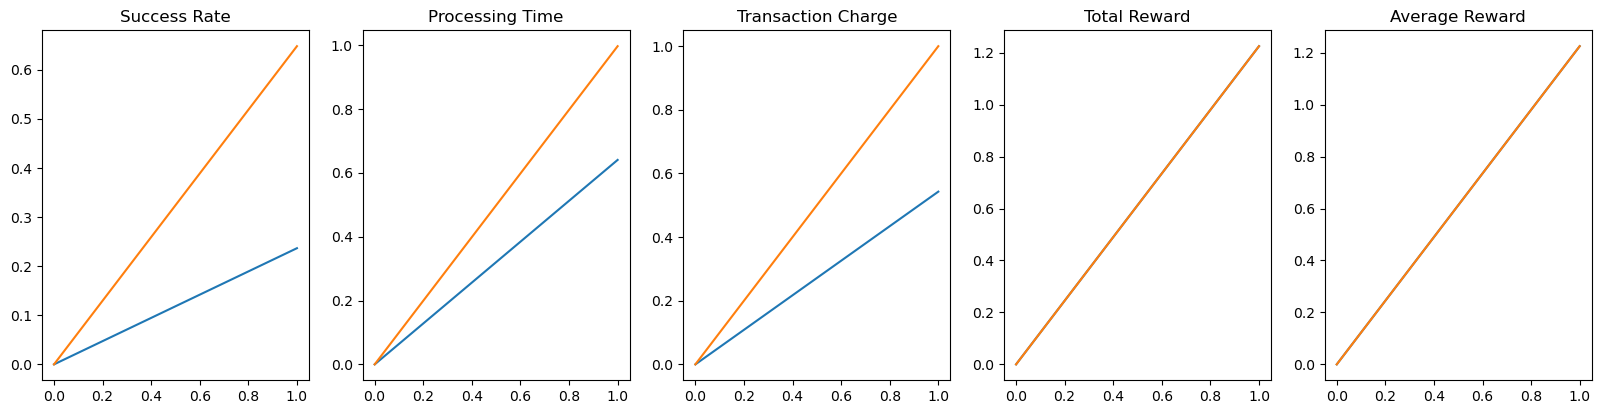

episode 1
total records before 2 success_rate_before 0.9 0
total records after 2 success_rate_after 0.9 0
________________________________________________________
episode 1
success_rate_before 0.5 0
success_rate_after 0.5 1
________________________________________________________
________________________________________________________
________________________________________________________
self.env.total_reward_before 1.2249793584666533
self.env.total_reward_after 1.2249793584666533
________________________________________________________
self.env.average_reward_before 1.2249793584666533
self.env.average_reward_after 1.2249793584666533


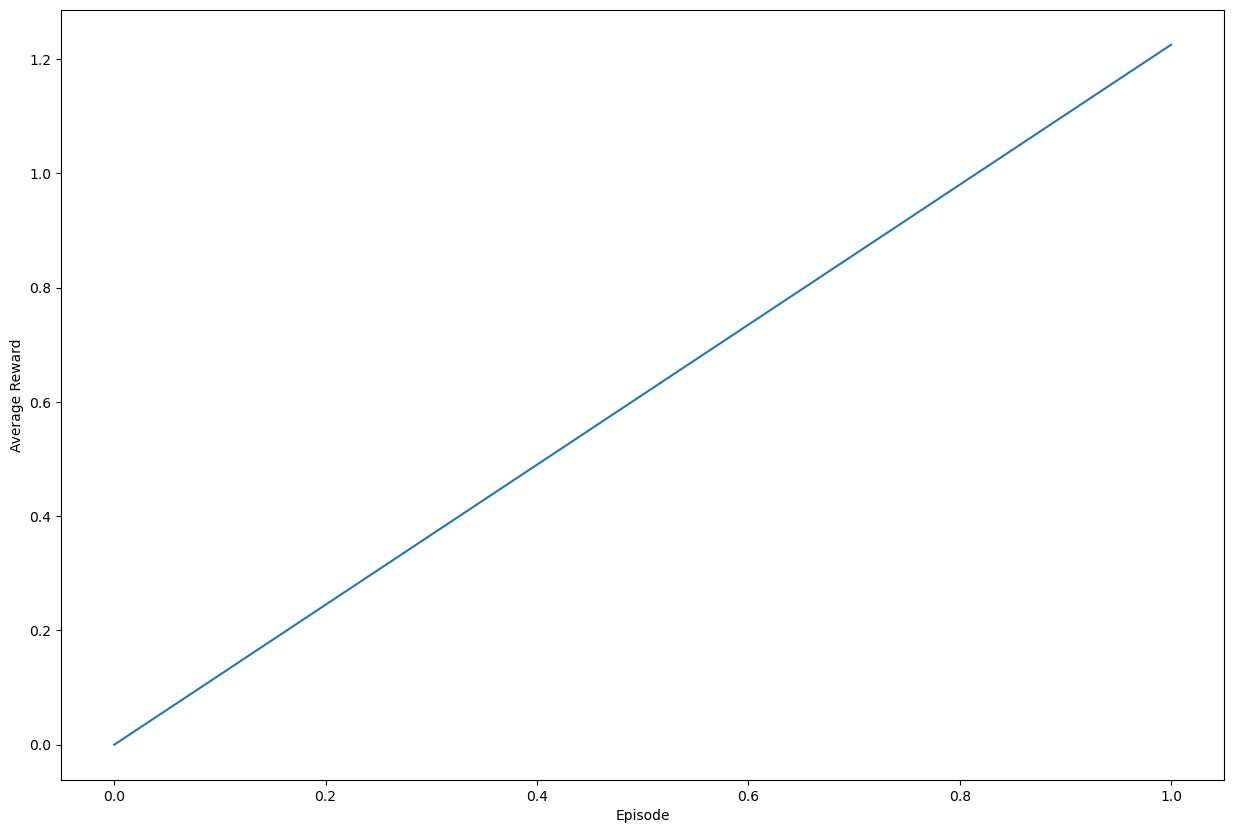

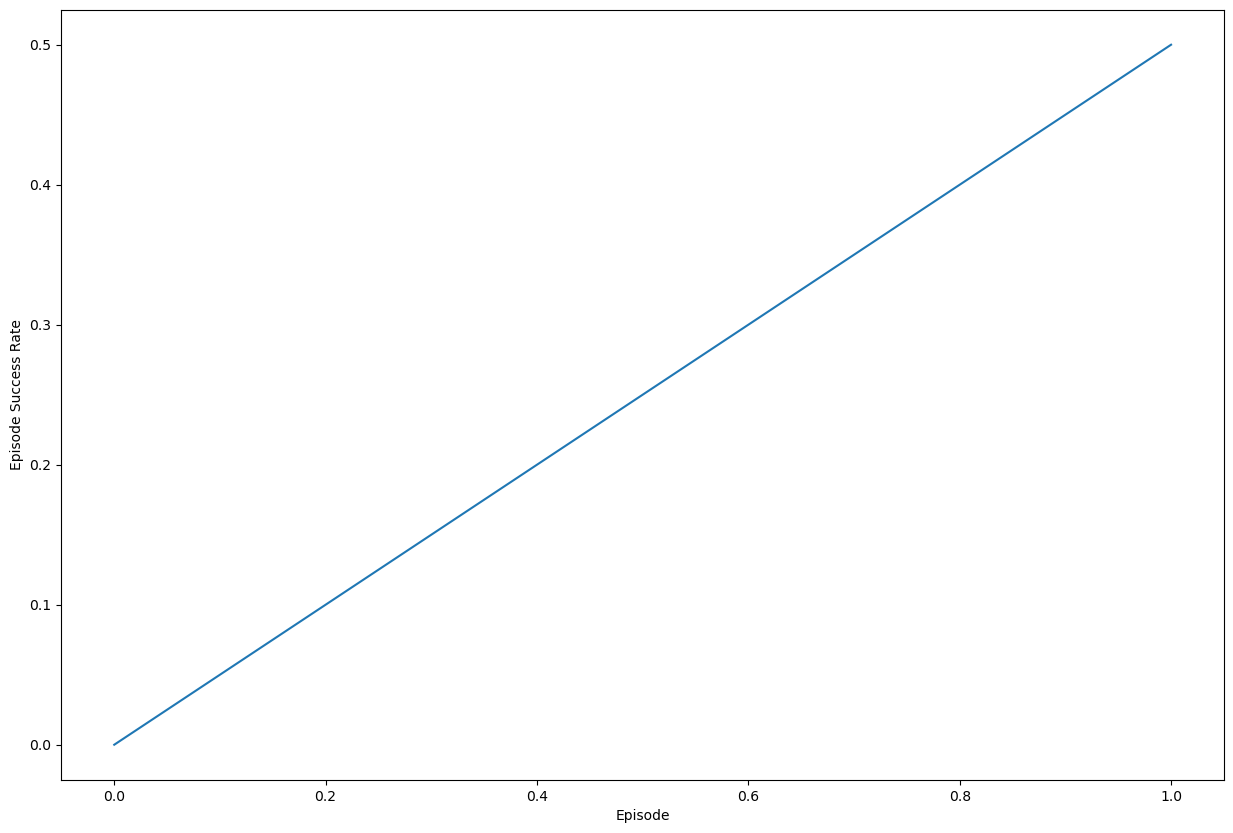

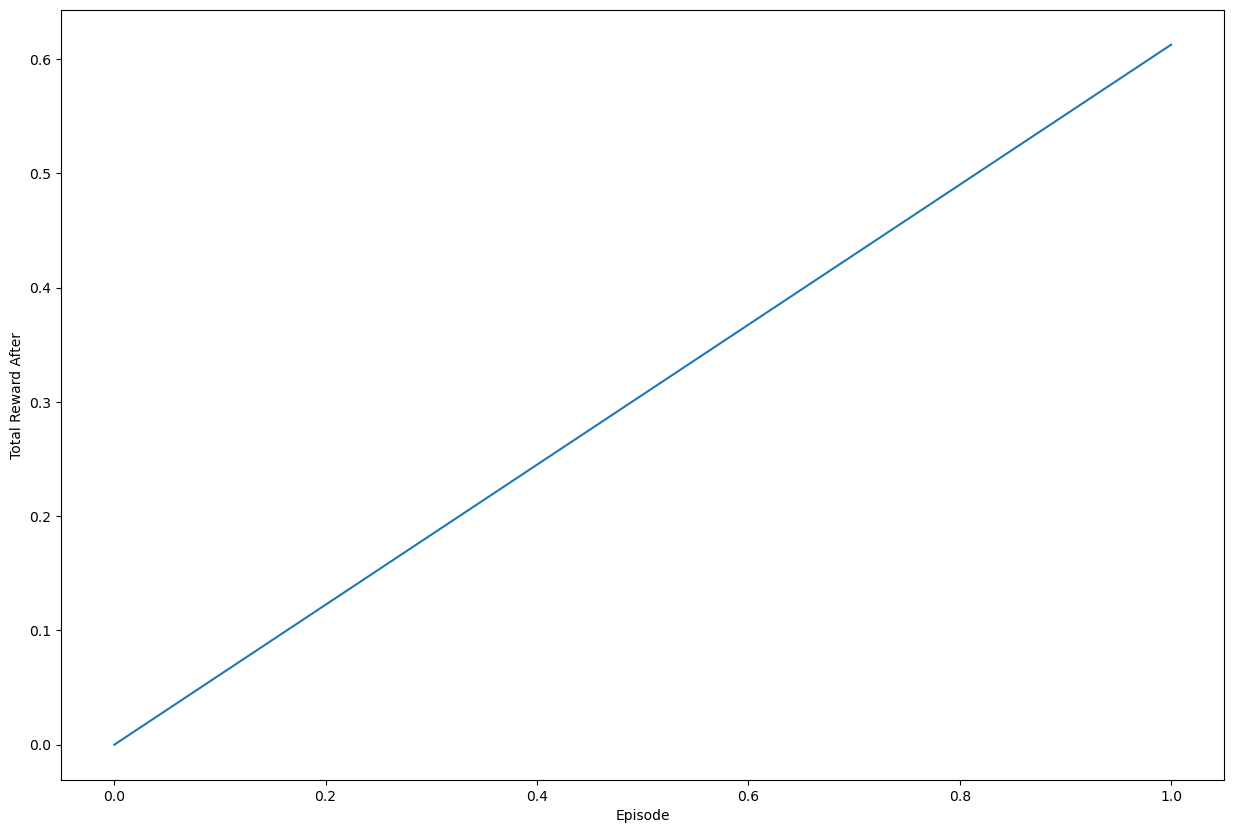

In [56]:
import tensorflow.keras.backend as K

env = PaymentEnv(X)
agent = DuelingDQN(env, env.observation_space.shape[0], env.action_space.n)
rewards = agent.train(episodes=1)

Episode 1 finished with total reward of 1.22
Episode 2 finished with total reward of 0.37
Episode 3 finished with total reward of 0.75
Episode 4 finished with total reward of 1.47
1/1 [==============================] - 0s 89ms/step


2023-05-15 20:34:55.773588: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-15 20:34:55.807550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Episode 5 finished with total reward of 1.60
Episode 6 finished with total reward of 2.36
Episode 7 finished with total reward of 2.73
Episode 8 finished with total reward of 3.32
1/1 [==============================] - 0s 8ms/step
Episode 9 finished with total reward of 2.73
Episode 10 finished with total reward of 2.74
Episode 11 finished with total reward of 3.40
1/1 [==============================] - 0s 8ms/step
Episode 12 finished with total reward of 4.03
Episode 13 finished with total reward of 5.73
Episode 14 finished with total reward of 6.45
Episode 15 finished with total reward of 5.76
Episode 16 finished with total reward of 5.42
Episode 17 finished with total reward of 6.37
Episode 18 finished with total reward of 6.27
1/1 [==============================] - 0s 8ms/step
Episode 19 finished with total reward of 6.43
Episode 20 finished with total reward of 7.40
Episode 21 finished with total reward of 5.93
Episode 22 finished with total reward of 4.94
Episode 23 finished with

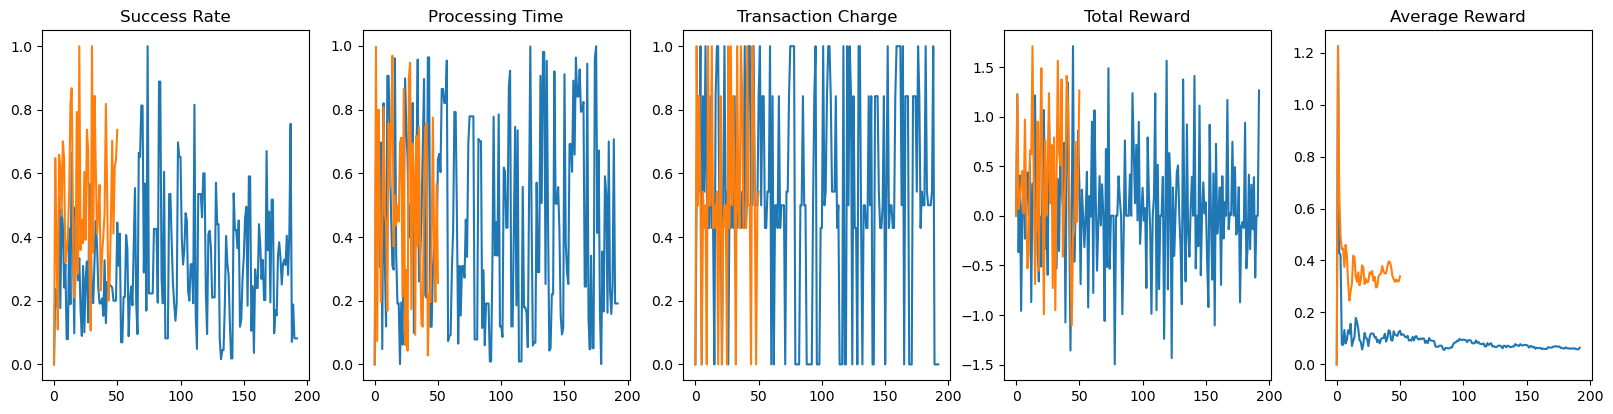

episode 50
total records before 193 success_rate_before 0.9 1
total records after 51 success_rate_after 0.9 2
________________________________________________________
episode 50
success_rate_before 0.5 32
success_rate_after 0.5 23
________________________________________________________
________________________________________________________
________________________________________________________
self.env.total_reward_before 12.329586406740601
self.env.total_reward_after 16.951001260160147
________________________________________________________
self.env.average_reward_before 0.24659172813481203
self.env.average_reward_after 0.33902002520320296


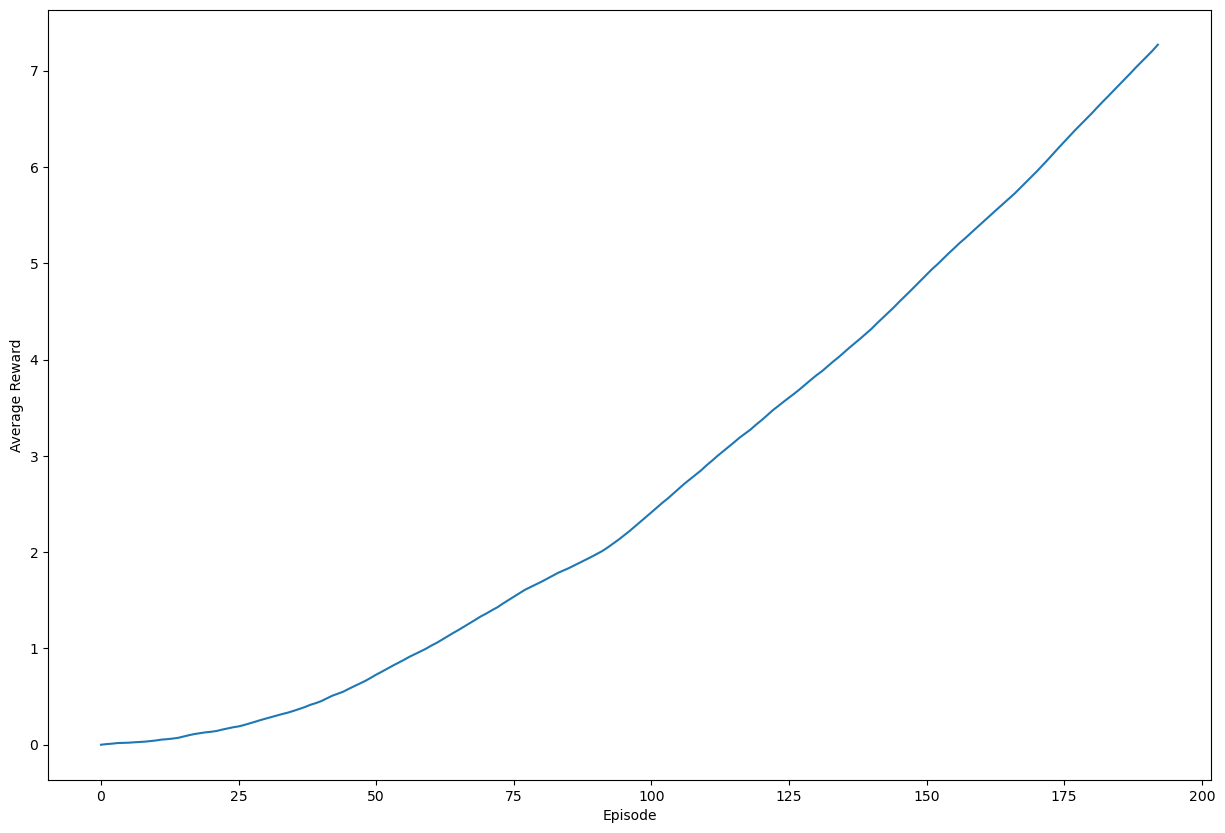

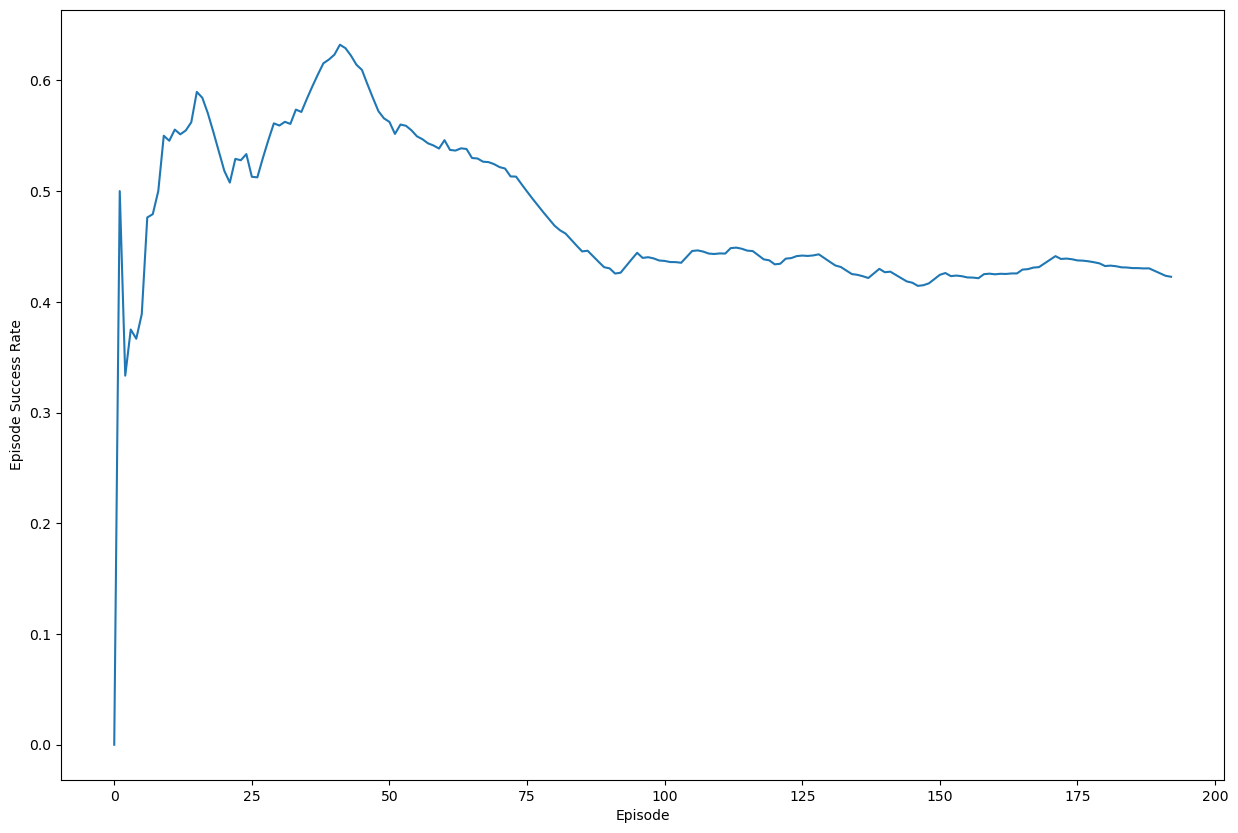

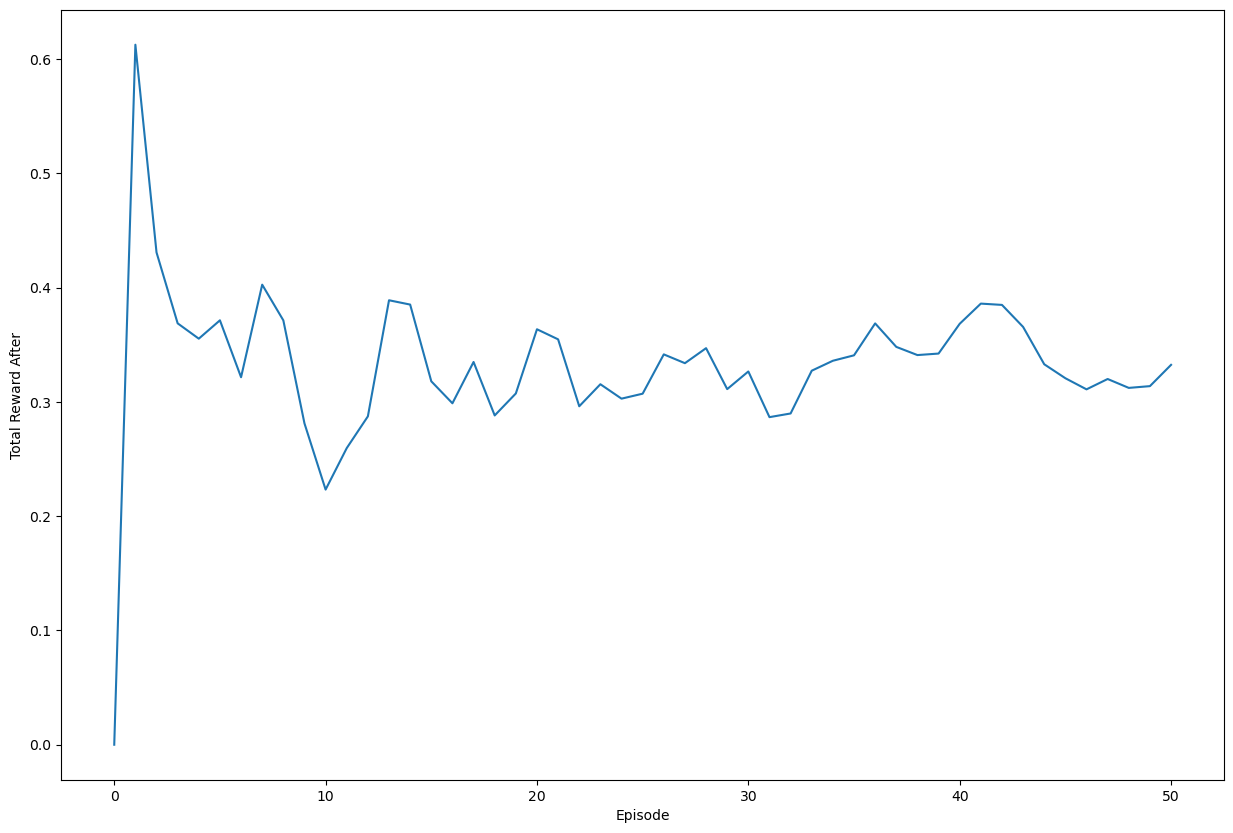

In [57]:
import tensorflow.keras.backend as K

env = PaymentEnv(X)
agent = DuelingDQN(env, env.observation_space.shape[0], env.action_space.n)
rewards = agent.train(episodes=50)

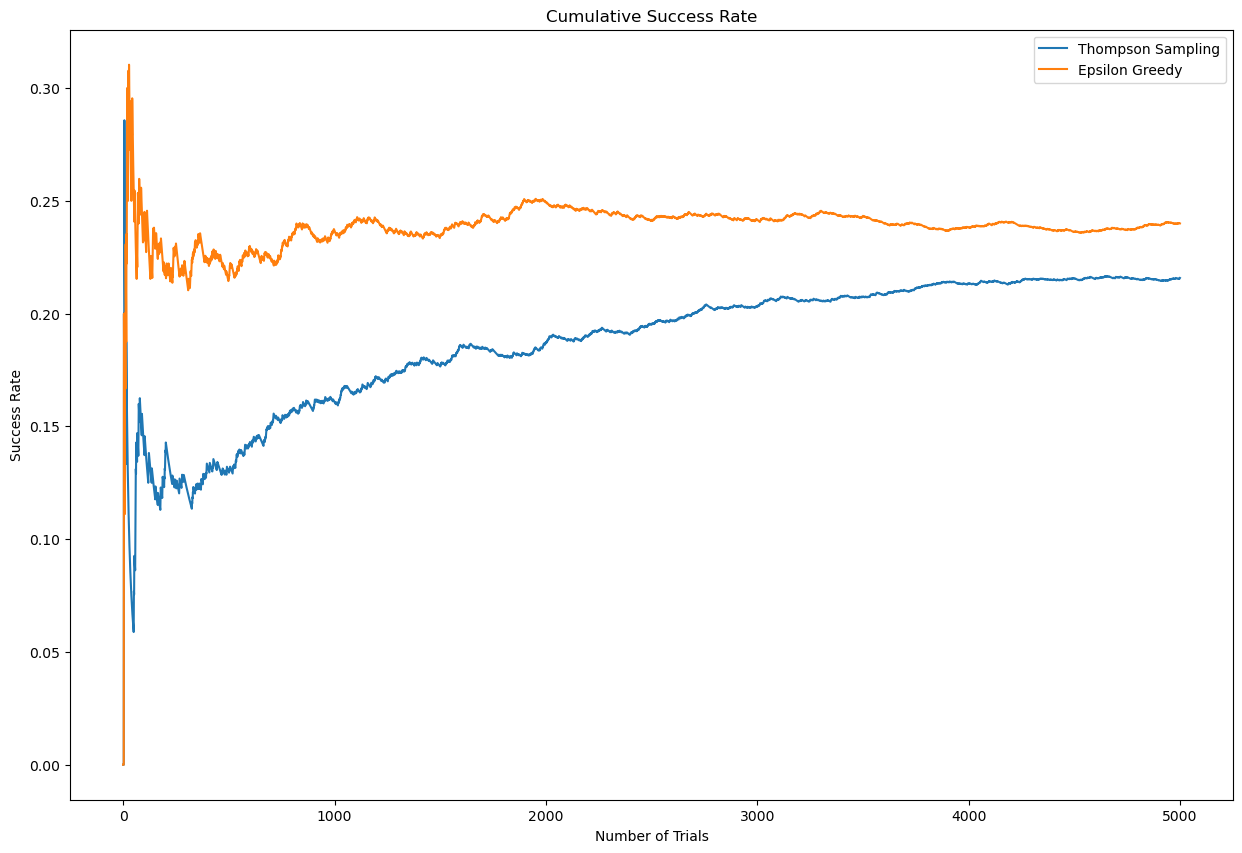

In [94]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(35)

# Define the number of trials and the number of arms
num_trials = 5000
num_arms = 7

# Define the true probabilities of success for each arm
true_probs = np.random.beta(1, 10, size=num_arms)

# Define the transaction charges for each arm
transaction_charges = np.random.uniform(0.01, 0.05, size=num_arms)

# Define the processing time for each arm
processing_times = np.random.normal(10, 2, size=num_arms)

# Define the weight vector for multi-objective Thompson Sampling
weights = np.array([0.6, 0.2, 0.2])

# Define the results arrays for both algorithms
ts_results = np.zeros(num_trials)
mots_results = np.zeros(num_trials)

# Define the Thompson Sampling algorithm function
def thompson_sampling(num_trials, num_arms, true_probs):
    # Define the successes and failures arrays
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    
    # Define the results array
    results = np.zeros(num_trials)
    
    # Loop over the number of trials
    for i in range(num_trials):
        # Sample a random value from each arm's beta distribution
        samples = np.random.beta(successes+1, failures+1)
        
        # Select the arm with the highest sample value
        choice = np.argmax(samples)
        
        # Update the successes and failures arrays based on the result of the chosen arm
        result = np.random.binomial(1, true_probs[choice])
        if result == 1:
            successes[choice] += 1
        else:
            failures[choice] += 1
        
        # Update the results array
        results[i] = result
    
    return results

# Define the Multi-Objective Thompson Sampling algorithm function
def multi_objective_thompson_sampling(num_trials, num_arms, true_probs, transaction_charges, processing_times, weights):
    # Define the successes and failures arrays
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    
    # Define the results array
    results = np.zeros(num_trials)
    
    # Loop over the number of trials
    for i in range(num_trials):
        # Sample a random value from each arm's beta distribution
        samples = np.random.beta(successes+1, failures+1)
        
        # Select the arm with the highest weighted sample value for each objective
        success_choices = np.argsort(weights[0]*samples - weights[1]*transaction_charges - weights[2]*processing_times)[::-1]
        choice = success_choices[0]
        
        # Update the successes and failures arrays based on the result of the chosen arm
        result = np.random.binomial(1, true_probs[choice])
        if result == 1:
            successes[choice] += 1
        else:
            failures[choice] += 1
        
        # Update the results array
        results[i] = result
    
    return results

# Run both algorithms and store the results in the results arrays
ts_results = thompson_sampling(num_trials, num_arms, true_probs)
mots_results = multi_objective_thompson_sampling(num_trials, num_arms, true_probs, transaction_charges, processing_times, weights)






# Plot the results
plt.plot(np.cumsum(ts_results)/np.arange(1, num_trials+1), label='Thompson Sampling')
plt.plot(np.cumsum(mots_results)/np.arange(1, num_trials+1), label='Epsilon Greedy')
plt.legend(loc='best')
plt.title('Cumulative Success Rate')
plt.xlabel('Number of Trials')
plt.ylabel('Success Rate')
plt.show()



In [65]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# split data into train and test sets
X = X_y.drop(['success_rate', 'processing_time', 'transaction_charge'], axis=1)
y_success = X_y['success_rate']
y_processing_time = X_y['processing_time']
y_transaction_charge = X_y['transaction_charge']

X_train, X_test, y_success_train, y_success_test, y_processing_time_train, y_processing_time_test, y_transaction_charge_train, y_transaction_charge_test = train_test_split(X, y_success, y_processing_time, y_transaction_charge, test_size=0.2, random_state=42)


In [66]:
import tensorflow as tf

# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(7)
])

# Compile the model
model.compile(optimizer='sgd', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

NameError: name 'y_train' is not defined

In [67]:
import tensorflow as tf

# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(7)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

NameError: name 'y_train' is not defined

In [68]:
y_predict = model.predict(X_test)

ValueError: in user code:

    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 5), found shape=(None, 3)


In [69]:
y_train

NameError: name 'y_train' is not defined

In [70]:
X_y.head(3)

success_rate  processing_time  transaction_charge  status  log_amount  type
0      0.146997         0.222222            0.542857     0.0    0.471088     2
1      0.844046         0.093093            0.000000     1.0    0.462875     0
2      0.159103         0.219219            1.000000     0.0    0.489609     5

In [71]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# split data into train and test sets
X = X_y.drop(['success_rate', 'processing_time', 'transaction_charge'], axis=1)
y_success = X_y['success_rate']
y_processing_time = X_y['processing_time']
y_transaction_charge = X_y['transaction_charge']

X_train, X_test, y_success_train, y_success_test, y_processing_time_train, y_processing_time_test, y_transaction_charge_train, y_transaction_charge_test = train_test_split(X, y_success, y_processing_time, y_transaction_charge, test_size=0.2, random_state=42)

# train random forest models
rf_success = RandomForestRegressor()
rf_processing_time = RandomForestRegressor()
rf_transaction_charge = RandomForestRegressor()

rf_success.fit(X_train, y_success_train)
rf_processing_time.fit(X_train, y_processing_time_train)
rf_transaction_charge.fit(X_train, y_transaction_charge_train)

# predict on test data
y_success_pred = rf_success.predict(X_test)
y_processing_time_pred = rf_processing_time.predict(X_test)
y_transaction_charge_pred = rf_transaction_charge.predict(X_test)


In [72]:
from sklearn.metrics import mean_squared_error, r2_score

# calculate MSE for success rate prediction
success_rate_mse = mean_squared_error(y_success_test, y_success_pred)
# calculate MSE for processing time prediction
processing_time_mse = mean_squared_error(y_processing_time_test, y_processing_time_pred)
# calculate MSE score for transaction charge prediction
transaction_charge_mse = mean_squared_error(y_transaction_charge_test, y_transaction_charge_pred)

print('MSE for success rate prediction:', success_rate_mse)
print('MSE for processing time prediction:', processing_time_mse)
print('MSE score for transaction charge prediction:', transaction_charge_mse)


# calculate RMSE for processing time prediction
success_rate_rmse = mean_squared_error(y_success_test, y_success_pred, squared=False)
processing_time_rmse = mean_squared_error(y_processing_time_test, y_processing_time_pred, squared=False)
transaction_charge_rmse = mean_squared_error(y_transaction_charge_test, y_transaction_charge_pred, squared=False)
print('RMSE for success rate prediction:', success_rate_rmse)
print('RMSE for processing time prediction:', processing_time_rmse)
print('RMSE score for transaction charge prediction:', transaction_charge_rmse)

# calculate R-squared score for transaction charge prediction
rf_success_score = rf_success.score(X_test, y_success_pred)
rf_processing_time_score = rf_processing_time.score(X_test, y_processing_time_pred)
rf_transaction_charge_score = rf_transaction_charge.score(X_test, y_transaction_charge_pred)

print("Random Forest Success Rate R^2 Score:", rf_success_score)
print("Random Forest Processing Time R^2 Score:", rf_processing_time_score)
print("Random Forest Transaction Charge R^2 Score:", rf_transaction_charge_score)


MSE for success rate prediction: 0.038304791860035374
MSE for processing time prediction: 0.09901183002772541
MSE score for transaction charge prediction: 3.389636702121535e-31
RMSE for success rate prediction: 0.19571610015539184
RMSE for processing time prediction: 0.31466145303758675
RMSE score for transaction charge prediction: 5.822058658345461e-16
Random Forest Success Rate R^2 Score: 1.0
Random Forest Processing Time R^2 Score: 1.0
Random Forest Transaction Charge R^2 Score: 1.0


In [73]:
X_y.head(3)

success_rate  processing_time  transaction_charge  status  log_amount  type
0      0.146997         0.222222            0.542857     0.0    0.471088     2
1      0.844046         0.093093            0.000000     1.0    0.462875     0
2      0.159103         0.219219            1.000000     0.0    0.489609     5

In [74]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_y.drop(["success_rate", "processing_time", "transaction_charge"], axis=1), X_y[["success_rate", "processing_time", "transaction_charge"]], test_size=0.2, random_state=42)

# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(3,)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(3)
])

print(model.summary())
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model on test data
accuracy = model.evaluate(X_test, y_test)

# Print accuracy
print('Accuracy:', accuracy)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 128)               512       
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 32)                2080      
                                                                 
 dense_49 (Dense)            (None, 16)                528       
                                                                 
 dense_50 (Dense)            (None, 3)                 51        
                                                                 
Total params: 11,427
Trainable params: 11,427
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


2023-05-15 20:39:29.092862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 16ms/step - loss: 0.1191 - val_loss: 0.0770
Epoch 2/5


2023-05-15 20:39:29.690487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 6ms/step - loss: 0.0633 - val_loss: 0.0577
Epoch 3/5
25/25 [==============================] - 0s 6ms/step - loss: 0.0538 - val_loss: 0.0515
Epoch 4/5
25/25 [==============================] - 0s 6ms/step - loss: 0.0492 - val_loss: 0.0473
Epoch 5/5
7/7 [==============================] - 0s 4ms/step - loss: 0.0466
Accuracy: 0.046630747616291046


2023-05-15 20:39:30.513215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [76]:
y_pred

array([[ 3.4180364e-01,  4.8844832e-01,  7.8223342e-01],
       [ 3.5710037e-01,  5.2360821e-01,  8.8955301e-01],
       [ 4.5409229e-01,  5.2367306e-01,  4.5096222e-01],
       [ 2.9823270e-01,  4.4948554e-01,  4.3823132e-01],
       [ 3.6904296e-01,  4.0951055e-01,  5.0074059e-01],
       [ 4.2248890e-01,  4.8896688e-01,  4.6218508e-01],
       [ 3.0542782e-01,  4.3399155e-01,  6.5836596e-01],
       [ 3.6355236e-01,  4.2237216e-01,  6.3966686e-01],
       [ 3.1936541e-01,  4.6562600e-01,  7.6756841e-01],
       [ 2.6918447e-01,  3.9319092e-01,  3.9319575e-01],
       [ 4.6931303e-01,  5.4316407e-01,  4.3869382e-01],
       [ 2.8132138e-01,  3.8411915e-01,  4.6335024e-01],
       [ 3.0297583e-01,  4.1733807e-01,  5.5974704e-01],
       [ 2.8862828e-01,  4.1594696e-01,  6.4677703e-01],
       [ 3.1228206e-01,  4.4240355e-01,  5.0905931e-01],
       [ 3.2489440e-01,  4.7104076e-01,  7.7108276e-01],
       [ 3.1282181e-01,  4.4192734e-01,  6.6344780e-01],
       [ 4.5798650e-01,  5.2740

In [77]:
import numpy as np

#y_pred = y_pred_tensor.numpy()
y_success_pred, y_processing_time_pred, y_transaction_charge_pred = np.split(y_pred, 3, axis=1)

In [78]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse_success = mean_squared_error(y_success_test, y_success_pred)
mse_processing_time = mean_squared_error(y_processing_time_test, y_processing_time_pred)
mse_transaction_charge = mean_squared_error(y_transaction_charge_test, y_transaction_charge_pred)

# calculate RMSE
rmse_success = mean_squared_error(y_success_test, y_success_pred, squared=False)
rmse_processing_time = mean_squared_error(y_processing_time_test, y_processing_time_pred, squared=False)
rmse_transaction_charge = mean_squared_error(y_transaction_charge_test, y_transaction_charge_pred, squared=False)

print('MSE Success Rate:', mse_success)
print('RMSE Success Rate:', rmse_success)

print('MSE Processing Time:', mse_processing_time)
print('RMSE Processing Time:', rmse_processing_time)

print('MSE Transaction Charge:', mse_transaction_charge)
print('RMSE Transaction Charge:', rmse_transaction_charge)


MSE Success Rate: 0.03263922159888182
RMSE Success Rate: 0.18066328237603185
MSE Processing Time: 0.0878275896494705
RMSE Processing Time: 0.2963571994223702
MSE Transaction Charge: 0.01942543394059839
RMSE Transaction Charge: 0.13937515539219458


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# Step 1: Import libraries

# Step 2: Load data
#X_y = pd.read_csv('your_dataset.csv')

# Step 3: Prepare data
X = X_y
y = X_y[['success_rate', 'processing_time', 'transaction_charge']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3)
])

# Step 5: Compile model
model.compile(optimizer='adam', loss='mse')

# Step 6: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Step 7: Evaluate model
test_loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

# Compute accuracy and other performance metrics


Epoch 1/50


ValueError: in user code:

    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 4), found shape=(32, 6)


In [ ]:
X_y.columns

In [ ]:
X_y.status.value_counts(normalize=True)

In [ ]:
import tensorflow as tf

# Define the neural network architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(5,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(7)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of trials and the number of arms
num_trials = 5000
num_arms = 7

# Define the true probabilities of success for each arm
true_probs = np.random.beta(1, 10, size=num_arms)

# Define the transaction charges for each arm
transaction_charges = np.random.uniform(0.01, 0.05, size=num_arms)

# Define the processing time for each arm
processing_times = np.random.normal(10, 2, size=num_arms)

# Define the weight vector for multi-objective Thompson Sampling
weights = np.array([0.6, 0.2, 0.2])

# Define the results arrays for both algorithms
ts_results = np.zeros(num_trials)
mots_results = np.zeros(num_trials)

# Define the Thompson Sampling algorithm function
def thompson_sampling(num_trials, num_arms, true_probs):
    # Define the successes and failures arrays
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    
    # Define the results array
    results = np.zeros(num_trials)
    
    # Loop over the number of trials
    for i in range(num_trials):
        # Sample a random value from each arm's beta distribution
        samples = np.random.beta(successes+1, failures+1)
        
        # Select the arm with the highest sample value
        choice = np.argmax(samples)
        
        # Update the successes and failures arrays based on the result of the chosen arm
        result = np.random.binomial(1, true_probs[choice])
        if result == 1:
            successes[choice] += 1
        else:
            failures[choice] += 1
        
        # Update the results array
        results[i] = result
    
    return results

# Define the Multi-Objective Thompson Sampling algorithm function
def multi_objective_thompson_sampling(num_trials, num_arms, true_probs, transaction_charges, processing_times, weights):
    # Define the successes and failures arrays
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    
    # Define the results array
    results = np.zeros(num_trials)
    
    # Loop over the number of trials
    for i in range(num_trials):
        # Sample a random value from each arm's beta distribution
        samples = np.random.beta(successes+1, failures+1)
        
        # Select the arm with the highest weighted sample value for each objective
        success_choices = np.argsort(weights[0]*samples - weights[1]*transaction_charges - weights[2]*processing_times)[::-1]
        choice = success_choices[0]
        
        # Update the successes and failures arrays based on the result of the chosen arm
        result = np.random.binomial(1, true_probs[choice])
        if result == 1:
            successes[choice] += 1
        else:
            failures[choice] += 1
        
        # Update the results array
        results[i] = result
    
    return results

# Run both algorithms and store the results in the results arrays
ts_results = thompson_sampling(num_trials, num_arms, true_probs)
mots_results = multi_objective_thompson_sampling(num_trials, num_arms, true_probs, transaction_charges, processing_times, weights)






# Plot the results
plt.plot(np.cumsum(ts_results)/np.arange(1, num_trials+1), label='Thompson Sampling')
plt.plot(np.cumsum(mots_results)/np.arange(1, num_trials+1), label='Epsilon Greedy')
plt.legend(loc='best')
plt.title('Cumulative Success Rate')
plt.xlabel('Number of Trials')
plt.ylabel('Success Rate')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of trials and the number of arms
num_trials = 5000
num_arms = 10

# Define the true probabilities of success for each arm
true_probs = np.random.beta(1, 10, size=num_arms)

# Define the transaction charges for each arm
transaction_charges = np.random.uniform(0.01, 0.05, size=num_arms)

# Define the processing time for each arm
processing_times = np.random.normal(10, 2, size=num_arms)

# Define the weight vector for multi-objective Thompson Sampling
weights = np.array([0.6, 0.2, 0.2])

# Define the results arrays for both algorithms
ts_results = np.zeros(num_trials)
mots_results = np.zeros(num_trials)

# Define the Thompson Sampling algorithm function
def thompson_sampling(num_trials, num_arms, true_probs):
    # Define the successes and failures arrays
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    
    # Define the results array
    results = np.zeros(num_trials)
    
    # Loop over the number of trials
    for i in range(num_trials):
        # Sample a random value from each arm's beta distribution
        samples = np.random.beta(successes+1, failures+1)
        
        # Select the arm with the highest sample value
        choice = np.argmax(samples)
        
        # Update the successes and failures arrays based on the result of the chosen arm
        result = np.random.binomial(1, true_probs[choice])
        if result == 1:
            successes[choice] += 1
        else:
            failures[choice] += 1
        
        # Update the results array
        results[i] = result
    
    return results

# Define the Multi-Objective Thompson Sampling algorithm function
def multi_objective_thompson_sampling(num_trials, num_arms, true_probs, transaction_charges, processing_times, weights):
    # Define the successes and failures arrays
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    
    # Define the results array
    results = np.zeros(num_trials)
    
    # Loop over the number of trials
    for i in range(num_trials):
        # Sample a random value from each arm's beta distribution
        samples = np.random.beta(successes+1, failures+1)
        
        # Select the arm with the highest weighted sample value for each objective
        success_choices = np.argsort(weights[0]*samples - weights[1]*transaction_charges - weights[2]*processing_times)[::-1]
        choice = success_choices[0]
        
        # Update the successes and failures arrays based on the result of the chosen arm
        result = np.random.binomial(1, true_probs[choice])
        if result == 1:
            successes[choice] += 1
        else:
            failures[choice] += 1
        
        # Update the results array
        results[i] = result
    
    return results

# Run both algorithms and store the results in the results arrays
ts_results = thompson_sampling(num_trials, num_arms, true_probs)
mots_results = multi_objective_thompson_sampling(num_trials, num_arms, true_probs, transaction_charges, processing_times, weights)






# Plot the results
plt.plot(np.cumsum(ts_results)/np.arange(1, num_trials+1), label='Thompson Sampling')
plt.plot(np.cumsum(mots_results)/np.arange(1, num_trials+1), label='Epsilon Greedy')
plt.legend(loc='best')
plt.title('Cumulative Success Rate')
plt.xlabel('Number of Trials')
plt.ylabel('Success Rate')
plt.show()



In [ ]:
df.columns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of trials and the number of arms
num_trials = 5000
num_arms = 10

# Define the true probabilities of success for each arm
true_probs = np.random.beta(1, 10, size=num_arms)

# Define the transaction charges for each arm
transaction_charges = np.random.uniform(0.01, 0.05, size=num_arms)

# Define the processing time for each arm
processing_times = np.random.normal(10, 2, size=num_arms)

# Define the weight vector for multi-objective Thompson Sampling
weights = np.array([0.6, 0.2, 0.2])

# Define the results arrays for both algorithms
ts_results = np.zeros(num_trials)
mots_results = np.zeros(num_trials)

# Define the Thompson Sampling algorithm function
def thompson_sampling(num_trials, num_arms, true_probs):
    # Define the successes and failures arrays
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    
    # Define the results array
    results = np.zeros(num_trials)
    
    # Loop over the number of trials
    for i in range(num_trials):
        # Sample a random value from each arm's beta distribution
        samples = np.random.beta(successes+1, failures+1)
        
        # Select the arm with the highest sample value
        choice = np.argmax(samples)
        
        # Update the successes and failures arrays based on the result of the chosen arm
        result = np.random.binomial(1, true_probs[choice])
        if result == 1:
            successes[choice] += 1
        else:
            failures[choice] += 1
        
        # Update the results array
        results[i] = result
    
    return results

# Define the Multi-Objective Thompson Sampling algorithm function
def multi_objective_thompson_sampling(num_trials, num_arms, true_probs, transaction_charges, processing_times, weights):
    # Define the successes and failures arrays
    successes = np.zeros(num_arms)
    failures = np.zeros(num_arms)
    
    # Define the results array
    results = np.zeros(num_trials)
    
    # Loop over the number of trials
    for i in range(num_trials):
        # Sample a random value from each arm's beta distribution
        samples = np.random.beta(successes+1, failures+1)
        
        # Select the arm with the highest weighted sample value for each objective
        success_choices = np.argsort(weights[0]*samples - weights[1]*transaction_charges - weights[2]*processing_times)[::-1]
        choice = success_choices[0]
        
        # Update the successes and failures arrays based on the result of the chosen arm
        result = np.random.binomial(1, true_probs[choice])
        if result == 1:
            successes[choice] += 1
        else:
            failures[choice] += 1
        
        # Update the results array
        results[i] = result
    
    return results

# Run both algorithms and store the results in the results arrays
ts_results = thompson_sampling(num_trials, num_arms, true_probs)
mots_results = multi_objective_thompson_sampling(num_trials, num_arms, true_probs, transaction_charges, processing_times, weights)






# Plot the results
plt.plot(np.cumsum(ts_results)/np.arange(1, num_trials+1), label='Thompson Sampling')
plt.plot(np.cumsum(mots_results)/np.arange(1, num_trials+1), label='Epsilon Greedy')
plt.legend(loc='best')
plt.title('Cumulative Success Rate')
plt.xlabel('Number of Trials')
plt.ylabel('Success Rate')
plt.show()



In [ ]:
def simulate(num_trials, num_arms, success_rates, transaction_charges, processing_times):
    # Initialize arrays to store results
    ts_rewards = np.zeros(num_trials)
    ts_actions = np.zeros(num_trials, dtype=int)
    mo_ts_rewards = np.zeros(num_trials)
    mo_ts_actions = np.zeros(num_trials, dtype=int)

    # Initialize Thompson Sampling agent
    ts_agent = ThompsonSampling(num_arms)

    # Initialize Multi-objective Thompson Sampling agent
    mo_ts_agent = MultiObjectiveThompsonSampling(num_arms)

    # Run simulations
    for i in range(num_trials):
        # Thompson Sampling
        ts_action = ts_agent.get_action()
        ts_reward = np.random.binomial(1, success_rates[ts_action]) - transaction_charges[ts_action]
        ts_agent.update(ts_action, ts_reward)
        ts_rewards[i] = ts_reward
        ts_actions[i] = ts_action

        # Multi-objective Thompson Sampling
        mo_ts_action = mo_ts_agent.get_action()
        mo_ts_reward = np.array([
            np.random.binomial(1, success_rates[a]) - transaction_charges[a] for a in range(num_arms)
        ])
        mo_ts_agent.update(mo_ts_action, mo_ts_reward)
        mo_ts_rewards[i] = np.sum(mo_ts_reward)
        mo_ts_actions[i] = mo_ts_action

    return ts_rewards, ts_actions, mo_ts_rewards, mo_ts_actions


In [ ]:
def simulate(num_trials, num_arms, success_rates, transaction_charges, processing_times):
    # Thompson Sampling
    ts_rewards = thompson_sampling(num_trials, num_arms, success_rates)

    # Multi-Objective Thompson Sampling
    mo_ts_rewards = multi_objective_thompson_sampling(num_trials, num_arms, success_rates, transaction_charges, processing_times)

    # Plot the results
    plt.plot(np.cumsum(ts_rewards)/np.arange(1, num_trials+1), label='Thompson Sampling')
    plt.plot(np.cumsum(mo_ts_rewards)/np.arange(1, num_trials+1), label='Multi-Objective Thompson Sampling')
    plt.legend()
    plt.title('Cumulative Average Rewards')
    plt.xlabel('Trials')
    plt.ylabel('Cumulative Average Reward')
    plt.show()

    # Print the total rewards and actions for each algorithm
    print('Thompson Sampling Total Rewards: {}'.format(np.sum(ts_rewards)))
    print('Thompson Sampling Total Actions: {}'.format(ts_actions))
    print('Multi-Objective Thompson Sampling Total Rewards: {}'.format(np.sum(mo_ts_rewards)))
    print('Multi-Objective Thompson Sampling Total Actions: {}'.format(mo_ts_actions))


In [ ]:
# Run both algorithms and store the results in the results arrays
ts_results = thompson_sampling(num_trials, num_arms, true_probs)
mots_results = multi_objective_thompson_sampling(num_trials, num_arms, true_probs, transaction_charges, processing_times, weights)


In [ ]:
ds_ts_results = pd.Series(ts_results)
ds_ts_results.value_counts()

In [ ]:
ds_mots_results = pd.Series(mots_results)
ds_mots_results.value_counts()

In [ ]:
X_train.shape, X_test.shape

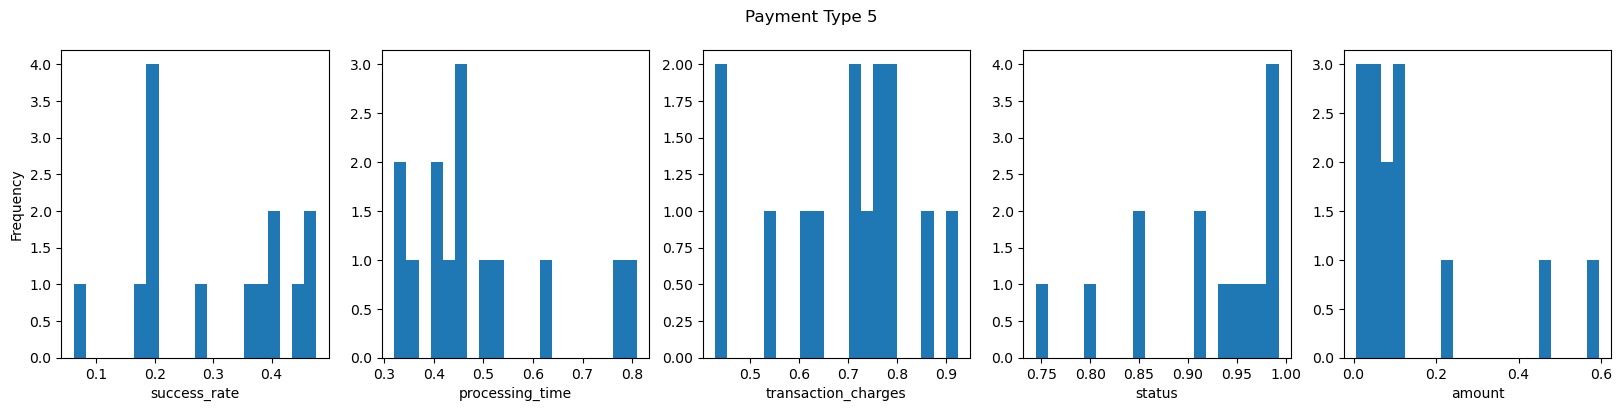

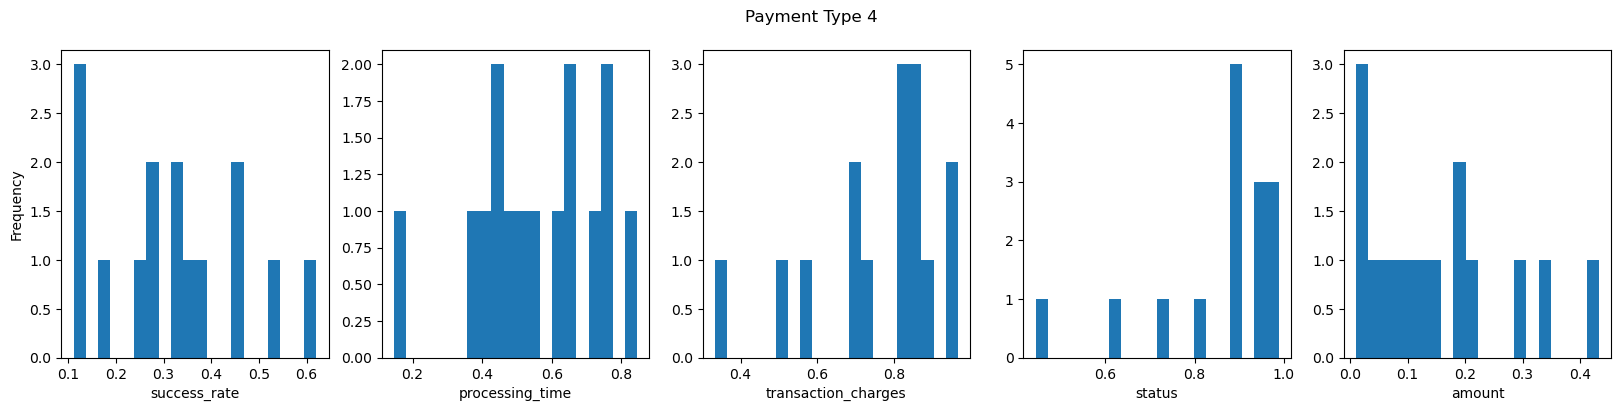

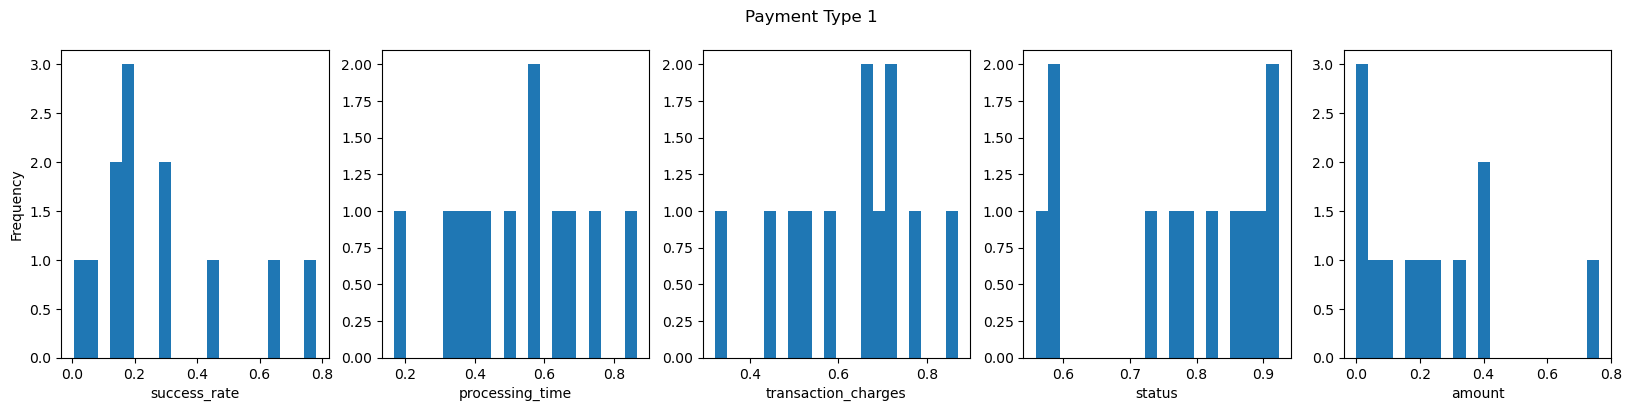

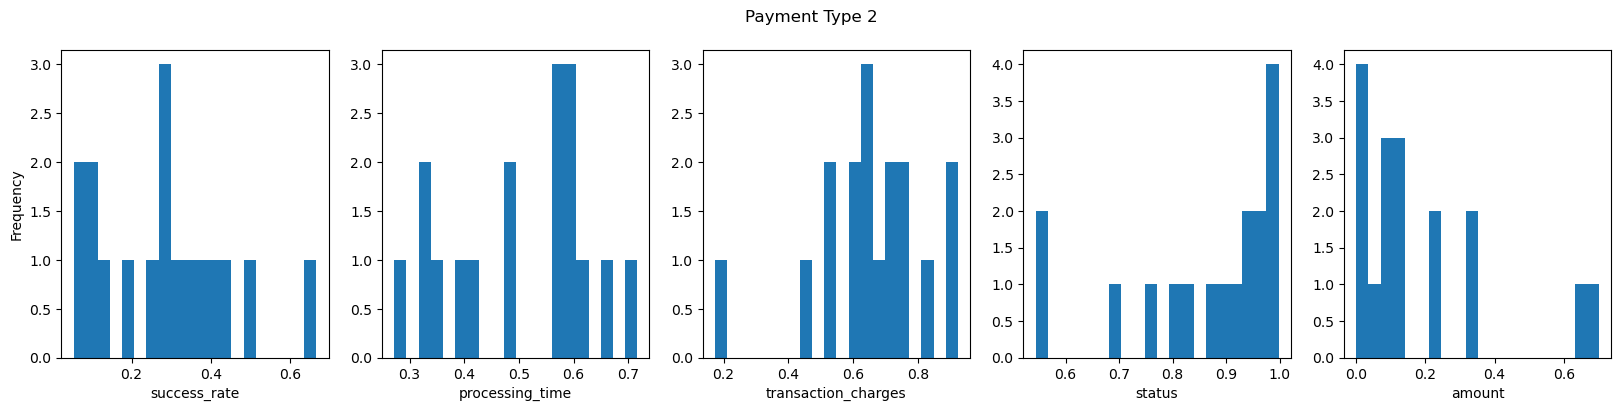

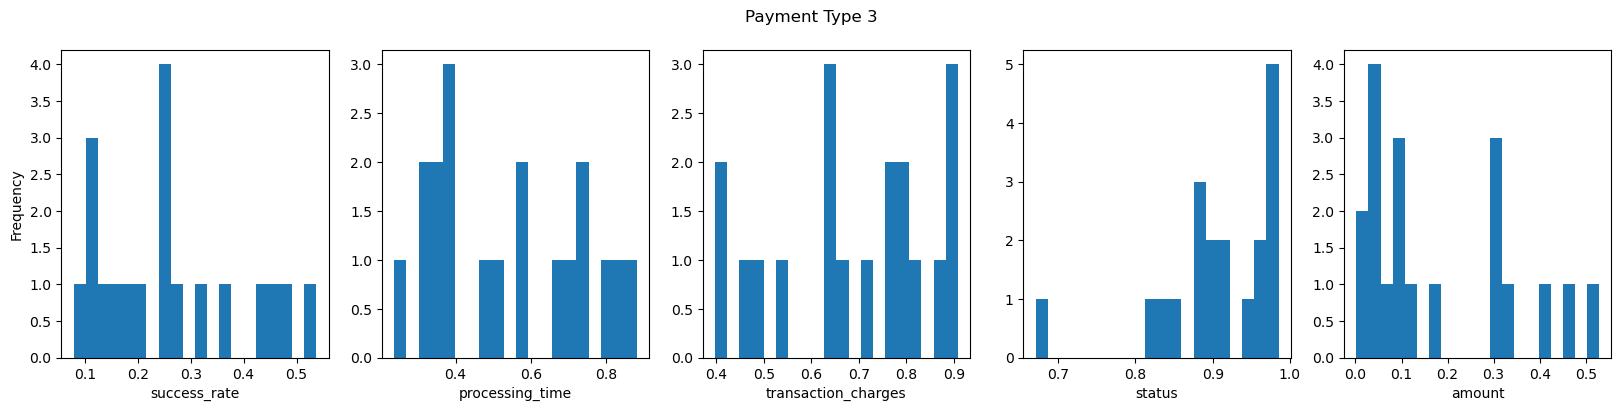

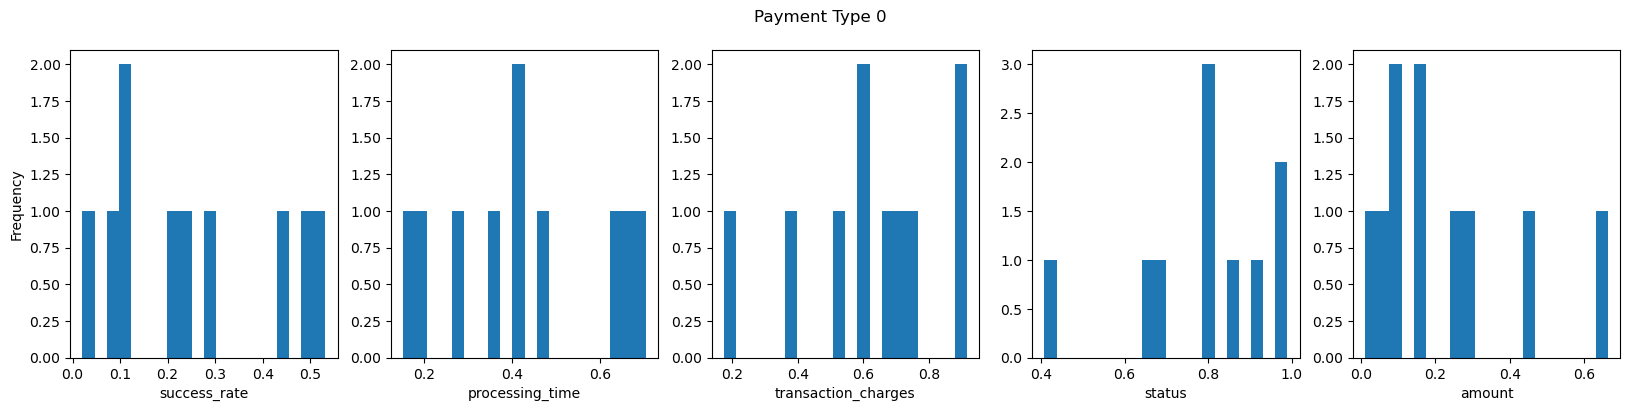

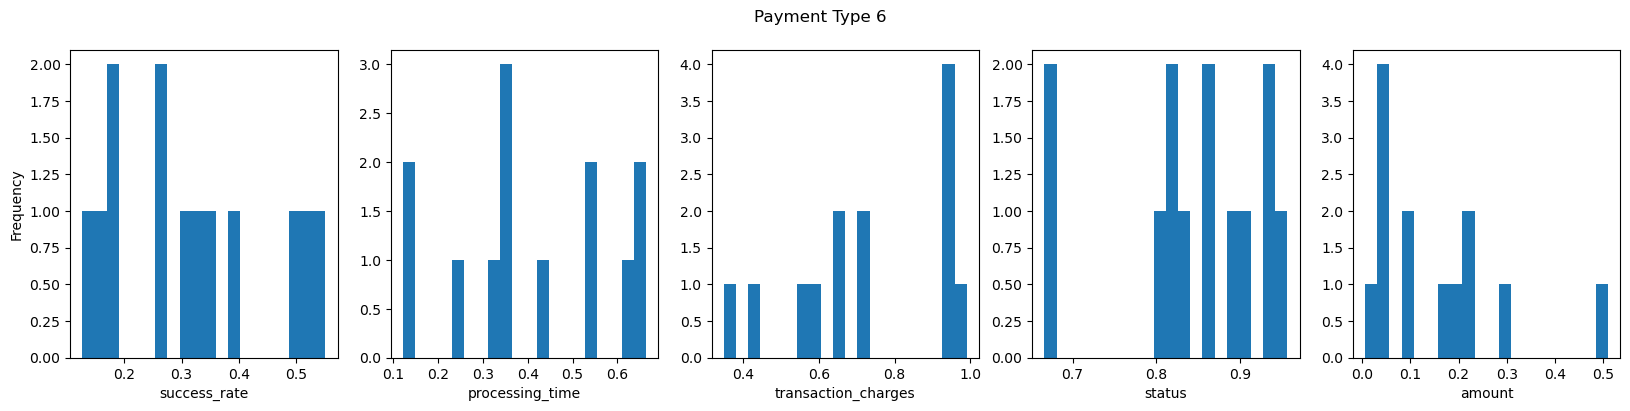

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate random data using beta distribution
success_rate = np.random.beta(2, 5, 100)   # alpha=2, beta=5
processing_time = np.random.beta(3, 3, 100) # alpha=3, beta=3
transaction_charges = np.random.beta(4, 2, 100) # alpha=4, beta=2
status = np.random.beta(5, 1, 100) # alpha=5, beta=1
amount = np.random.beta(1, 4, 100) # alpha=1, beta=4

# Create a pandas DataFrame
df = pd.DataFrame({'success_rate': success_rate,
                   'processing_time': processing_time,
                   'transaction_charges': transaction_charges,
                   'status': status,
                   'amount': amount})

# Add a payment type column with values 0-6
df['payment_type'] = np.random.randint(0, 7, 100)

# Plot the distribution for each payment type
payment_types = df['payment_type'].unique()
for payment_type in payment_types:
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))
    axs[0].set_ylabel('Frequency')
    fig.suptitle(f'Payment Type {payment_type}')
    data = df[df['payment_type'] == payment_type]
    for i, col in enumerate(df.columns[:-1]):
        axs[i].hist(data[col], bins=20)
        axs[i].set_xlabel(col)
    plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([81.13925399369354,
  727.8398809294558,
  3948.1147623095508,
  580.8549698236619,
  512.5526313507845,
  346.7319229036252,
  1137.311194224576,
  66.23181141897115,
  276.6011178949515,
  151.3548891827271])

In [3]:
a.mean()

782.8732434031997

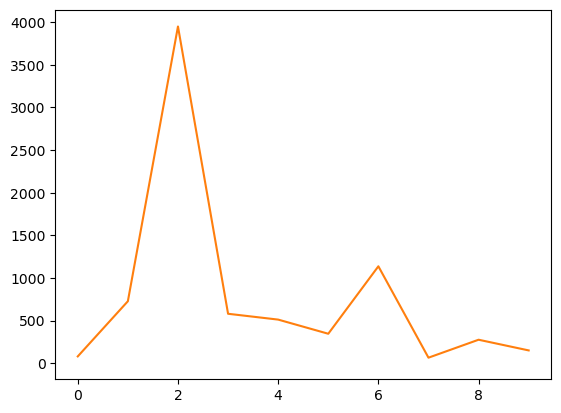

In [6]:
plt.plot(1, len(a), a)
plt.show()